# Inteligencia Artificial Aplicada al Análisis de Datos Biológicos

__Análisis de datos de expresión con algoritmos no supervisados__

_MeIA_

`2025`

# Algoritmos No-Supervisados


- Reducción de dimensionalidad
  - Proyección lineal
    - Descomposición de valores singulares *
    - Análisis de componentes principales *
    - Proyección aleatorias

  - Aprendizaje múltiple
    - Isomap
    - t-distributed stochastic neighbor embedding *
    - NMF *
    - Análisis de componentes independientes
   

- Clustering
  - K-means *
  - Cluster jerárquico *
  - DBSCAN

- Extracción de características
  - Autoencoders

- Biclustering



# Reducción de dimensiones

La reducción de dimensiones es una herramienta muy utilizada a la hora de utilizar algoritmos de inteligencia artíficial para procesar datos de $n$ dimensiones.

En general, a medida que se aumenta el tamaño del conjunto de datos (ya sea porque se agregan características (features) o porque se tienen más muestras) utilizado para entrenar un algoritmo, se requieren más recursos para poder procesarlos incluyendo memoria RAM, CPU y espacio de disco para almacenar el conjunto de datos.

En determinadas ocaciones también puede ocurrir que se agregan más features a un conjunto de datos que no aportan información y en consecuencia no tiene sentido utilizar dichos features para entrenar el algoritmo.

La reducción de dimensiones se encarga de buscar una representación más compacta de un conjunto de datos no solo para optimizar el uso de recursos sino también para otros usos: visualización de datos, comrpesión de imágenes, feature engineering, etc.

El número de caracteristicas en un conjunto de datos es conocido como su dimensión, por lo tanto si el número de características aumenta, el número de dimensiones también incrementa.

<img src="../Imagen/features.png" width="600" height="350"/>

Datos de paciente con cancer (1000 filas y 25 columnas)

De manera que estos datos de alta dimensión pueden plantear varios desafíos, como los siguientes:

- Aumento en el costo computacional
- Visualización de datos de alta dimensión
- Redundancia de datos, de manera que es necesario conservar los datos con mayor varianza y con la información más relevante

### Maldición de la dimensionalidad

<img src="../Imagen/dimensionality.png" width="600" height="350"/>

<img src="../Imagen/Bellman.png" width="600" height="350"/>



Richard E. Bellman

Una solución es dada por medio de la reducción de la dimensionalidad, que consiste en disminuir el número de dimensiones en un espacio de características

<img src="../Imagen/reduction.png" width="600" height="350"/>


### Importancia de la reducción de dimensionalidad

- Remover las caracteristicas redundantes
- Menos poder de cómputo durante el entrenamiento
- Es posible reducir el sobreajuste
- Mejora el rendimiento
- Nos ayuda a reducir el espacio de almacenamiento

### Descomposición en valores propios de una matriz

Una matriz $A$ de tamaño $nxn$ se puede descomponer en un conjunto de valores propios (eigenvectores) (x) y valores propios (eigenvalores) ($\lambda$) de manera que:
$$(A-λ I)=0$$
Se llaman eigenvalores o valores propios.

La solución $x$ que satisface:
$$(A-λ I)x=0$$

se llama eigenvectores o vectores propios.



Existen diferentes metodos para realizar una descomposición en eigenvectores y en eigenvalores.

- Método de potencias
- SVD, Descomposición de Valores Singulares

## Singular Values Descomposition

<img src="../Imagen/svd.jpeg" width="600" height="350"/>

Dada una matriz $A$ de tamaño $mxn$, la descomposición de valores singulares es de la forma

$$A=UΣV^T$$
Donde:

- $U$ es una matriz ortogonal de tamaño $mxm$, cuyas columnas son los vectores singulares izquierdos de $A$.
- $Σ$ es una matriz diagonal de tamaño $mxn$, con elementos no negativos, conocidos como valores singulares de $A$.
- $V^T$ es la transpuesta de la matriz ortogonal $V$, de tamaño $nxn$, cuyas columnas son los vectores singulares derechos de $A$.


### Aplicaciones
- Reducción de dimensiones
- Compresión de imágenes
- Compresión de videos
- Reconstrucción de imagenes
- Reconstrucción de sistemas
- Procesamiento de señales
- Procesamiento de texto y lenguaje natural

1) Descomposición de valores singulares de la matriz A

Dada una matriz A calcular su descomposición en valores singulares y posteriormente reconstruirla.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga de bibliotecas de numpy y scipy
from numpy import array
from scipy.linalg import svd
#Definimos la matriz A
A = array([[5,1],[2,-2],[4,9]])
print(A)

[[ 5  1]
 [ 2 -2]
 [ 4  9]]


In [3]:
#Descomposición de la matriz A
U, Sigma, VT = svd(A)
print("Matriz U:\n",U) #Matriz ortogonal U
print("Matriz Sigma: \n",Sigma) #Valores singulares
print("Matriz VT:\n",VT) #Matriz ortogonal VT

Matriz U:
 [[ 0.32743953  0.78898129 -0.51989603]
 [-0.06818241  0.56852442  0.81983605]
 [ 0.94240889 -0.23299896  0.23995201]]
Matriz Sigma: 
 [10.38265511  4.81668691]
Matriz VT:
 [[ 0.50762241  0.86157965]
 [ 0.86157965 -0.50762241]]


# Principal Component Analysis

Dada una serie de datos compuestos por $n$ observaciones y $m$ características, los cuales hacemos pasar por una caja negra que en principio no sabemos que contiene y esta nos devuelve $n$ observaciones con $k$ características nuevas.

$$
A\in \Re ^{nxm} \rightarrow \Box \rightarrow A' \in \Re^{nxk}
$$

$(k<m)$

Dependiendo del algoritmo en el cubo podemos obtener un conjunto diferente, esto depende de la función que optimice o priorice el algoritmo utilizado.

- PCA es una técnica de reducción de dimensiones

---

inventada por Karl Pearson en 1901.
- El algoritmo busca encontrar el espacio PCA, el cual representa la dirección de la varianza máxima de los datos.
- El espacio PCA consiste de componentes proncipales ortogonales, es decir ejes y vectores.

#### Definición de PCA

<img src="../Imagen/pca.png" width="600" height="350"/>



### Procesamiento por SVD
- Centramos los datos
- Realizamos la descomposición SVD
  - $U$ es la matriz de vectores propios izquierdos
  - $Σ$ es la matriz con los vectores singulares (Raíces cuadradas de los valores propios de V)
  - $V^T$ es la matriz de vectores propios derechos
- Ordenamos los componentes pincipales. Es decir, los valores singulares de $Σ$ de mayor a menos
- Seleccionamos los componentes principales
- Calculamos los vectores propios de los componentes principales.

In [4]:
#También podemos definir una clase para PCA basada en SVD
class PCASVD:
  def __init__(self, n_components):
    self.n_components_ = n_components

  def fit(self, X):
    self.means_ = X.mean(axis=0) #Calcula las medias de las caracteristicas
    X -= self.means_ #Centramos los datos

    U, S, V = np.linalg.svd(X) #Calculamos la Singular Value Descomposition
    self.vars_ = S[:self.n_components_]**2 / (X.shape[0] - 1) #Almacenar variaciones explicadas por componentes principales
    self.components_ = V[:self.n_components_].T #Almacena los componentes principales seleccionados

  #Transforma los datos proyectandolos en PC
  def transform(self, X):
    return (X - self.means_) @ self.components_

  #Trnasformación inversa de los datos para proyectarlos en el espacio original
  def inverse_transform(self, X_reduced):
    return X_reduced @ self.components_.T + self.means_

In [5]:
#Podemos definir una clase para PCA basado en la matriz de covarianza
class PCA:
  #Inicia PCA con un numero de componentes
  def __init__(self, n_components):
    self.n_components_ = n_components

  #Ajusta el modelo en los datos para obtener:
  def fit(self, X):
    self.means_ = X.mean(axis=0) #Calcula la media de cada caracteristica
    devs = X - self.means_ #Centramos los datos restando la media

    cov = (devs.T @ devs) / (X.shape[0] - 1) #Calcula la matriz de covarianza
    l, u = np.linalg.eig(cov) #Calcula los eigenvalores y eigenvectores

    lts = l.argsort()[::-1] #Ordena los eigenvalores de forma desendente
    u = u[:, lts] #Ordena los eigenvectores de acuerdo a sus eigenvalores
    l = l[lts]

    self.components_ = u[:, :self.n_components_] #Almacena los componentes principales seleccionados
    self.vars_ = l[:self.n_components_] #Almacenamos la varianza explicada por cada componentes principales

  #Transforma los datos proyectandolos en PC
  def transform(self, X):
    return (X - self.means_) @ self.components_ #Prpyectamos los datos en los componentes principales

  #Trnasformación inversa de los datos para proyectarlos en el espacio original
  def inverse_transform(self, X_reduced):
    return X_reduced @ self.components_.T + self.means_ #Reconstruimos los datos en el espacio original

## Conjunto de datos de Iris


<img src="https://miro.medium.com/v2/resize:fit:1400/0*11IwZmSKXw77eYz5" width="600" height="350"/>

El conjunto de datos Iris, es un conjunto de datos introducido por Ronald Fisher en 1936. Este conjunto de datos consta de 50 muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolir), con cuatro features: longitud y ancho de los sépalos y pétalos, en centimetros. 

Apliquemos el PCA que acabamos de programar en conjunto de datos de flores iris. Elegimos los atributos de ancho y largo sepal y visualizamos el conjunto.

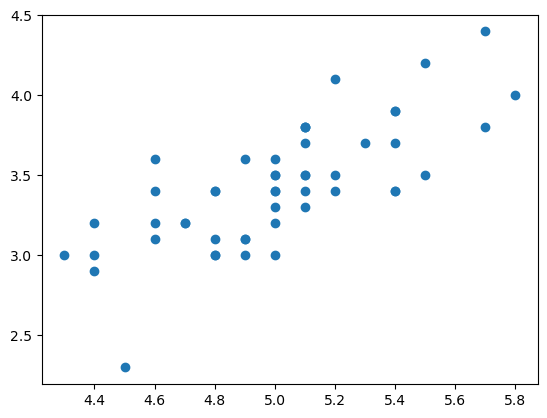

In [6]:
from sklearn.datasets import load_iris

iris = load_iris() #Lee el dataset de iris
p2d = iris['data'][:,:2] #Seleccionamos solo las 2 primera caracteristicas
p2d = p2d[iris['target']==0] #Filtra las muestras con etiqueta 0
plt.plot(p2d[:, 0], p2d[:, 1], 'o') #Grafica los puntos en 2D
plt.show()

Encontramos sus 2 componentes principales

In [7]:
pca2d = PCA(2) #Crea un modelo de PCA para 2 componentes
pca2d.fit(p2d) #Corremos el modelo PCA en los datos de 2D

Visualizamos los componentes principales encontrados

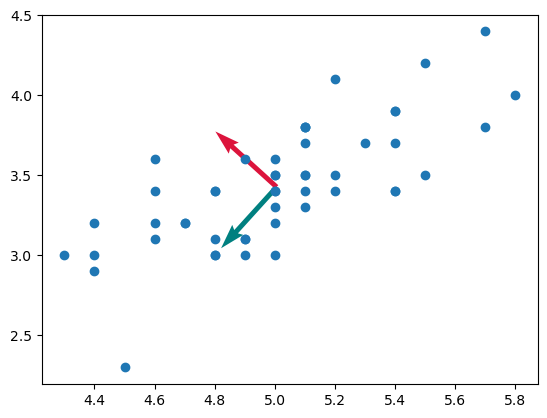

In [8]:
# Graficamos los componentes principales
plt.plot(p2d[:, 0], p2d[:, 1], 'o') #Graficamos el dataset 2D original
colors = ['teal', 'crimson']
for c,u in zip(colors, pca2d.components_):
  #Encontramos el centro y trazamos una flecha que representa cada dirección de cada PC
  means = p2d.mean(axis=0)
  plt.quiver(means[0], means[1], u[0], u[1], width=0.01,
             scale=6,
             color=c)
plt.show()

Desplegamos sus valores.

In [9]:
print(pca2d.components_) #Componentes principales
print(pca2d.vars_) #Las variaciones explicadas por cada CP

[[-0.67174957 -0.74077832]
 [-0.74077832  0.67174957]]
[0.23366074 0.03427804]


Hacemos los mismo con la implementación de PCA por SVD.

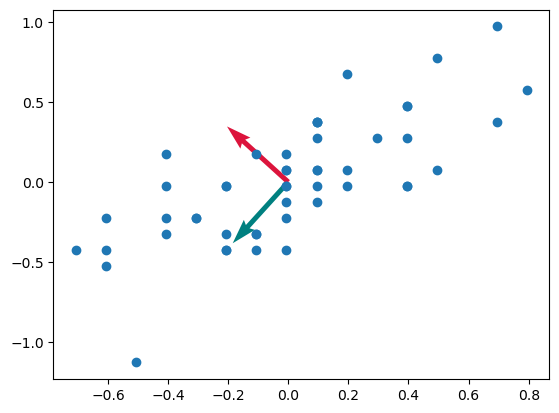

In [10]:
pca2dsvd = PCASVD(2) # Creamos el modelo con SVD
pca2dsvd.fit(p2d) #Realizamos el modelo con los datos "D"
plt.plot(p2d[:, 0], p2d[:, 1], 'o')
colors = ['teal', 'crimson']
for c,u,v in zip(colors, pca2dsvd.components_, pca2dsvd.vars_):
  means = p2d.mean(axis=0)
  plt.quiver(means[0], means[1], u[0], u[1], width=0.01, scale=6, color=c)
plt.show()

In [11]:
print(pca2dsvd.components_)
print(pca2dsvd.vars_)

[[-0.67174957 -0.74077832]
 [-0.74077832  0.67174957]]
[0.23366074 0.03427804]


Reducimos dimensiones del conjunto de ejemplos de 3 (ancho y largo del sépalo y ancho del pétalo).

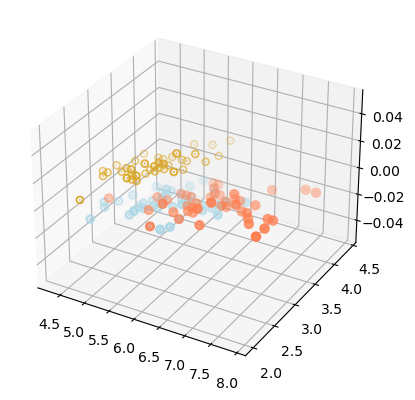

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p3d = iris['data'][:, :3] #Tomamos un subconjunto de 3D

colores=['goldenrod', 'lightblue', 'coral']
for i,c in enumerate(colores):
  plt.scatter(p3d[iris['target']==i,0], p3d[iris['target']==i, 1], p3d[iris['target']==i, 2], lw=5, color=c) #Lo graficamos de acuerdo a cada uno de las especies de flores

In [13]:
#Comparación entre PCA con la matriz de covarianza, SVD y la implementación PCA de sklearn
pca3d_2c = PCA(2)
pca3d_2c.fit(p3d)
print(pca3d_2c.components_)
print(pca3d_2c.vars_)

pcasvd3d_2c = PCASVD(2)
pcasvd3d_2c.fit(p3d)
print(pcasvd3d_2c.components_)
print(pcasvd3d_2c.vars_)

from sklearn.decomposition import PCA as SKPCA
skpca = SKPCA(n_components=2, whiten=False)
skpca.fit(p3d)
print(skpca.components_)
print(skpca.explained_variance_)

[[-0.38983343  0.63922328]
 [ 0.09100801  0.74305866]
 [-0.91637735 -0.19813487]]
[3.69111979 0.24137727]
[[ 0.38983343 -0.63922328]
 [-0.09100801 -0.74305866]
 [ 0.91637735  0.19813487]]
[3.69111979 0.24137727]
[[ 0.38983343 -0.09100801  0.91637735]
 [ 0.63922328  0.74305866 -0.19813487]]
[3.69111979 0.24137727]


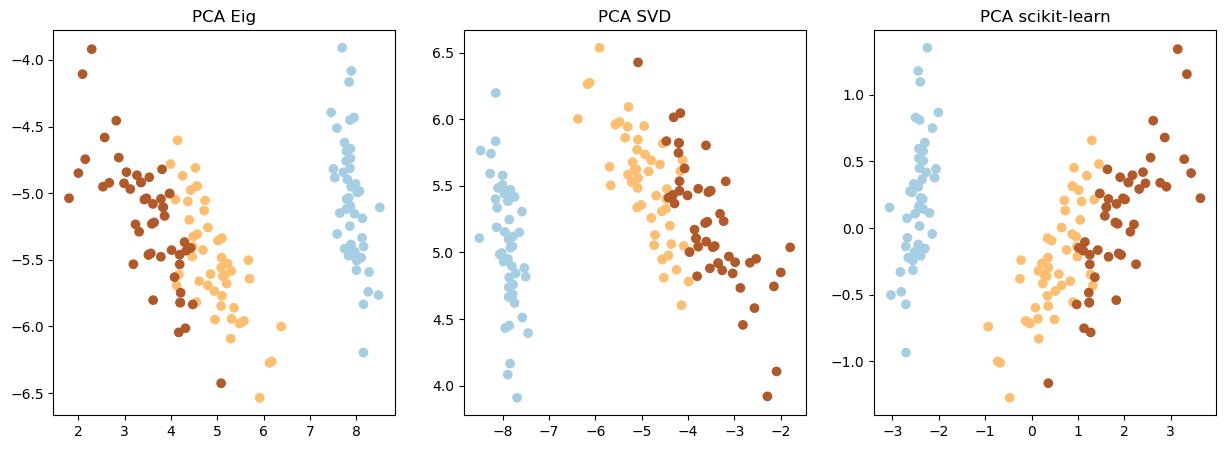

In [14]:
#Ahora se graficaran los tres metodos para compararlos
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#Transformamos los datos usando las diferentes implementaciones de PCA
proj = pca3d_2c.transform(p3d)
projsvd = pcasvd3d_2c.transform(p3d)
skproj = skpca.transform(p3d)

from matplotlib import cm

axs[0].scatter(proj[:, 0], proj[:, 1], c=iris.target, cmap=cm.Paired)
axs[0].set_title('PCA Eig')
axs[1].scatter(projsvd[:, 0], projsvd[:, 1], c=iris.target, cmap=cm.Paired)
axs[1].set_title('PCA SVD')
axs[2].scatter(skproj[:, 0], skproj[:, 1], c=iris.target, cmap=cm.Paired)
axs[2].set_title('PCA scikit-learn')
plt.show()

# K-means clustering

Es un algoritmo no supervisado, que se utiliza para encontrar patrones escondidos dentro de los conjuntos de los datos y forman clusters determinando similitudes dentro de los conjuntos de los datos y colocando a los objetos más similares en el mismo grupo, el cual es llamado cluster.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:720/format:webp/1*rw8IUza1dbffBhiA4i0GNQ.png)

La agrupación por K-means sigue una regla iterativa simple para clasificar un conjunto de datos sin etiquetas, o más específicamente, para formar racimos.

La agrupación tiene una amplia gama de aplicaciones en biología para estudiar datos de expresión, reutilización de fármacos y categorización de organismos o proteínas.



K-means tiene como objetivo la partición de un conjunto de $n$ observaciones en $k$ grupos en el que cada observación pertenece al grupo cuyo valor medio o más cercano. Cada elemento pertenece a un solo grupo.





### La forma en que funciona el algoritmo de k-means es la siguiente:

- Especifique el número de grupos K.

- Inicializar las coordenadas de los centroides.
  Los centroides se inicializan en coordenadas aleatorias.

- Asignación de cada punto a un clúster
  Se calcula la distancia de cada punto a cada centroide, y se agrupa con aquel centroide más proximo.

- Se recalculan los centroides de los clústers
  una vez que se tienen todos los puntos asignados a un cluster, se recalculan los centrodes de manera que vuelven a ser los centros de cada cluster.

- Se repiten los paso hasta llegar a un criterio de parada.



![texto del vínculo](https://miro.medium.com/v2/resize:fit:1400/1*xmP2wO8ODdlmOKbo6ZCnzw.png)

### Criterios de parada

- Los centroides dejan de cambiar.

- Los puntos dejan de cambiar de clúster.

- Limite de iteraciones.

El algoritmo k-means resuelve un problema de optimización, siendo la función a optimizar (minimizar) la suma de las distancias cuadráticas de cada objeto al centroide de su cluster.

Los objetos se representan como vectores reales de $d$ dimensiones $(x_1, x_2, ..., x_n)$ y el algoritmo k-means construye $k$ grupos donde se minimiza la suma de distancias de los objetos, dentro de cada grupo $S=\{S_1,S_2,...,S_k\}$, a su centroide. El problema se puede formular de la siguiente forma:

$min_sE(\mu_i) =min_s\sum_{i=1}^k\sum||x_j-\mu_i||^2$

donde $S$ es un conjunto de datos cuyos elementos son los objetos $x_i$ representados por vectores, donde cada uno de sus elementos representa una característica o atributo. Tendremos  $k$  grupos o clusters con su correspondiente centroide $\mu_i$.

En cada actualización de los centriodes, desde el punto de vista matemático, imponemos la condición necesaria de extremo a la función $E(\mu_i)$ que, para la función cuadrática es

$\frac{1}{|S_i^{(t)}}\sum {x_j}$

y se toma el promedio de los elementos de cada grupo como nuevo centroide.


### Pros y Contras

Ventajas
- Es eficiente, converge rápidamente
- La busqueda heurística termina en un óptimo local

Desventajas
- No robusto frente a observaciones atípicas
- No aplicable a variables categóricas
- No funciona si se buscan grupos convexos
- El número de grupos K se debe especificar


# Implementación de K-means usando Sklearn

In [15]:
import matplotlib.pyplot as plt


Podemos generar un conjunto de ``datos ficticios`` para probar nuestra implementación.

Para generar los datos utilizamos una biblioteca de sklearn llamada datasets. Particularmente el método "make_blobs". El cual crea conjuntos de datos aleatorios con una cantidad determinada de muestras, clustering y características.

Text(0, 0.5, 'X2')

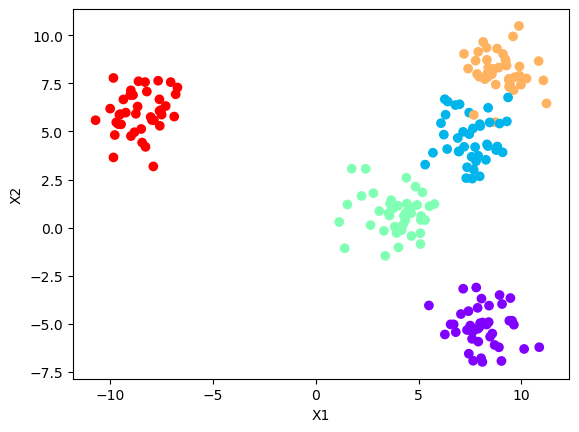

In [16]:
from sklearn.datasets import make_blobs
# Create Data

data = make_blobs(n_samples=200, n_features=2,
centers=5, cluster_std=1,random_state=150)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
plt.xlabel('X1')
plt.ylabel('X2')

### Elección del número de clusters

La elección del numero de clustering es determinante en este tipo de algoritmos, por lo que para elegir el valor óptimo de k, entrenaremos el modeo con diferentes valores de k mientras observamos la suma de cuadrados dentro de un grupo (WCSS).

La distania de los puntos a su centroide se calculan y se eleva al cuadrado. A continuación, se suman todas las distancias al cuadrado para calcular el error.

A medida que aumenta el valor de k, el error disminuye. A partir del grafico de WCSS vs el valor $k$, podemos determinar el valor optimo.

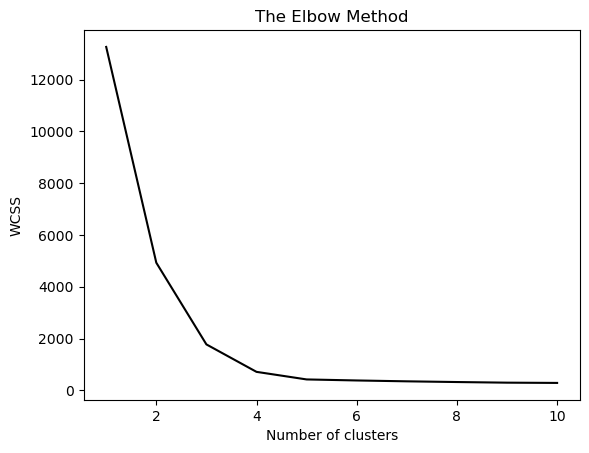

In [17]:
from sklearn.cluster import KMeans
X=data[0] #Coordenadas (features)
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=150)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar
plt.plot(range(1, 11), wcss, color='k')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Este grafico es denominada grafico del codo (Elbow), en el cual se observa que la pendiente del error se estabiliza a partir de k=5.

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init = 'k-means++')
kmeans.fit(data[0])

KMeans(n_clusters=5)

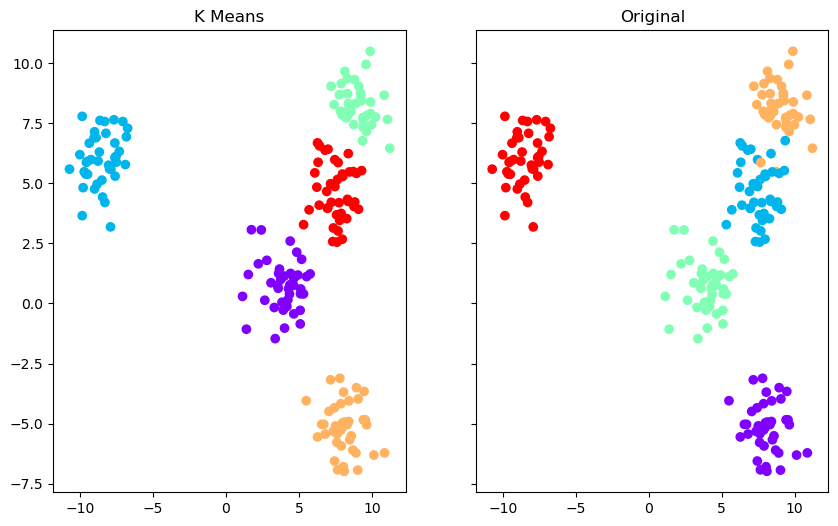

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

Podemos observar que el área y la estructura de los clusters originales y los clusters predichis por k-means som en su mayoría similares con errores mínimos en las regiones superpuestas


In [21]:
kmeans.cluster_centers_

array([[ 3.89242402,  0.72606842],
       [-8.53502186,  5.98022091],
       [ 9.01735573,  8.23432609],
       [ 8.1037214 , -5.1507853 ],
       [ 7.51724497,  4.61232782]])

## K-means clustering aplicada a genes diferencialmente expresados



### Análisis de genes diferencialmente expresados en microarreglos

Un análisis clasico en el estudio de la expresión genética es por medio de microarreglos y RNAseq, tecnologías de alto rendimiento que nos permiten medir la expresión de un gran número de genes. Particularmente comparamos la expresión entrecélulas sanas y células afectadas, donde las células sanas se denominan control y las células afectadas se condideran células tratadas.

Los microarreglos son chips de genes que contienen oligonucleótidos cortos de una simple hebra que tienen una secuencia complementaria con los genes, que permite que estos se anclen en el portaobjetos microscopico que amenudo se denomica chip de genes o chips de ADN. Estos oligonucleótidos actuan como sondas para detectar la expresión génica. Los ARN se recogen de las muestras, se convierten en cDNA, se marcan con colorantes flourescentes y se distribuyen por el chip de microarray. 

La idea principal es que el cDNA se hibridará con las respectivas sondas complementarias mediante la formación de enlaces de hidrógeno estables y, por lo tanto, la fluorescencia se puede detectar en cada punto. La intensidad de la fluorescencia es directamente proporcional al número de ARN en ese punto, cuantificando así la expresión del gen respectivo.

<img src="../imagen/microarray-de-adn.png" width="700" height="auto"/>

Una cámara de alta resolución toma una fotografía del chip y se utilizan diferentes tipos de software para medir las intensidades en los puntos. Cada chip puede contener más de 30000 puntos.

Para el análisis de la expresión génica diferencial, requerimos un mínimo de dos conjuntos de datos: un conjunto de control y un conjunto tratado. Las intensidades registradas luego se procesan para filtrar el ruido de fondo y luego se registran para su posterior análisis.

Existen varios recursos bioinformáticos, como Gene Expression Omnibus y ArrayExpress, donde se depositan los datos de microarrays generados a partir de múltiples experimentos y están disponibles públicamente.
    https://www.ncbi.nlm.nih.gov/geo/
    https://www.ncbi.nlm.nih.gov/sra
    https://www.ebi.ac.uk/biostudies/arrayexpress
    

Hay varias canalizaciones para analizar datos de microarrays, y cualquiera puede utilizarse en función de los objetivos de la investigación. En este ejemplo, aprenderemos sobre el manejo básico de datos de microarrays y análisis preliminar. Para este ejemplo, tenemos un conjunto de datos de ejemplo que consta de cuatro muestras de control y cuatro tratadas.

Un análisis típico de datos de microarrays se compone de los siguientes pasos:

    • Extracción de características
    • Control de calidad
    • Normalización
    • Análisis de expresiones diferenciales

El procedimiento discutido anteriormente, es decir, convertir la imagen de la micromatriz en intensidades significativas o valores cuantificables que se guardan en formato binario o de texto, se conoce como extracción de características, esto no lo realizaremos. Los datos Raw se pueden descargar desde las bases de datos antes mencionadas

A continuación, se lleva a cabo el control de calidad (QC) de los datos para determinar la calidad de los datos. Debido a que la intensidad de emisión de las etiquetas de fluorescencia también depende de la intensidad de la fuente de luz expuesta, se pueden producir artefactos experimentales debido al cambio de intensidad de la luz expuesta.

Para minimizar estos artefactos, se iguala la distribución de los genes expresados en cada muestra. 

In [23]:
import pandas as pd
#Datos de expresión genética de homo sapiens
expression = pd.read_csv('../Datos/Sesiones/expression_data.csv') 

expression.head()

ID_REF  Control_1  Control_2  Control_3  Control_4  Treated_1  \
0     1007_s_at     1752.5      986.7     1398.1     1107.1     1539.2   
1        121_at      810.1      496.3      228.7      619.1      441.9   
2       1316_at      958.5      918.9      531.2     1314.2     1113.7   
3  1552257_a_at      517.1      691.2      375.6      563.8      216.4   
4  1552264_a_at     1471.4     1408.7     1334.7     1923.2     1451.9   

   Treated_2  Treated_3  Treated_4  
0     1605.3     4663.0     1995.4  
1      427.1      324.9      242.6  
2      769.2     1182.8      974.8  
3      260.1      446.2      291.4  
4     1866.6      823.1     1367.5

In [24]:
expression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16525 entries, 0 to 16524
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_REF     16525 non-null  object 
 1   Control_1  16525 non-null  float64
 2   Control_2  16525 non-null  float64
 3   Control_3  16525 non-null  float64
 4   Control_4  16525 non-null  float64
 5   Treated_1  16525 non-null  float64
 6   Treated_2  16525 non-null  float64
 7   Treated_3  16525 non-null  float64
 8   Treated_4  16525 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


La columna ID_REF se refiere a los identificadores de los puntos en el microarreglo, y las columnas respectivas en el archivo de expresión representan las intensidades de las muestras para un punto en particular. 

El archivo de expresión contiene 16525 puntos o genes.

In [25]:
#Muchas veces tenemos datos adicionales para cada gen o proteína
#Esta incluye diferentes identificadores por las que podemos identificar a un gen o proteínas
annotation = pd.read_csv('../Datos/Sesiones/annotation_file.csv')
annotation.head()

ID_REF  GB_ACC       Gene Symbol     ENTREZ_GENE_ID
0  1007_s_at  U48705  DDR1 /// MIR4640  780 /// 100616237
1    1053_at  M87338              RFC2               5982
2     117_at  X51757             HSPA6               3310
3     121_at  X69699              PAX8               7849
4  1255_g_at  L36861            GUCA1A               2978

El archivo de anotaciones también tiene la columna ID_REF y las otras columnas son los identificadores de los genes correspondientes. 

La calidad de los datos podría inferirse visualizando su distribución..

/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


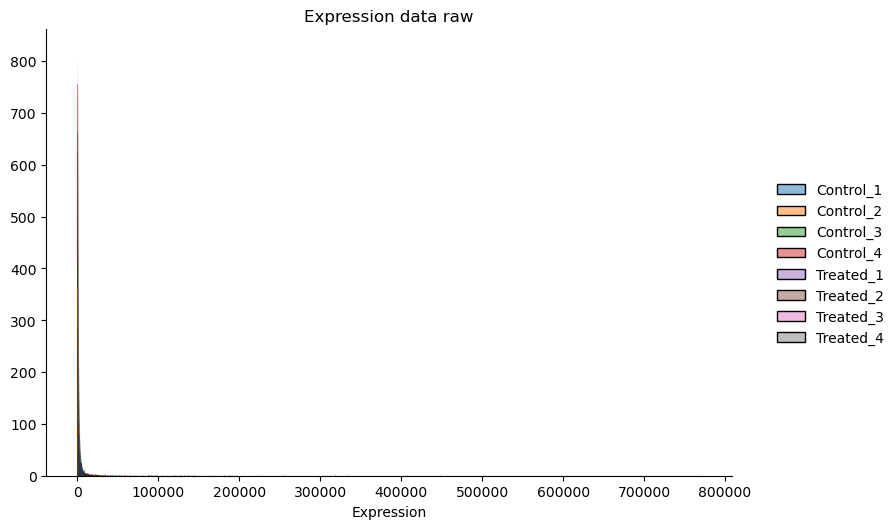

In [26]:
import seaborn as sns

fig=sns.displot(expression,  height=5, aspect=1.6)
plt.title("Expression data raw")
fig.set_axis_labels('Expression', '')


Text(0, 0.5, 'Expression')

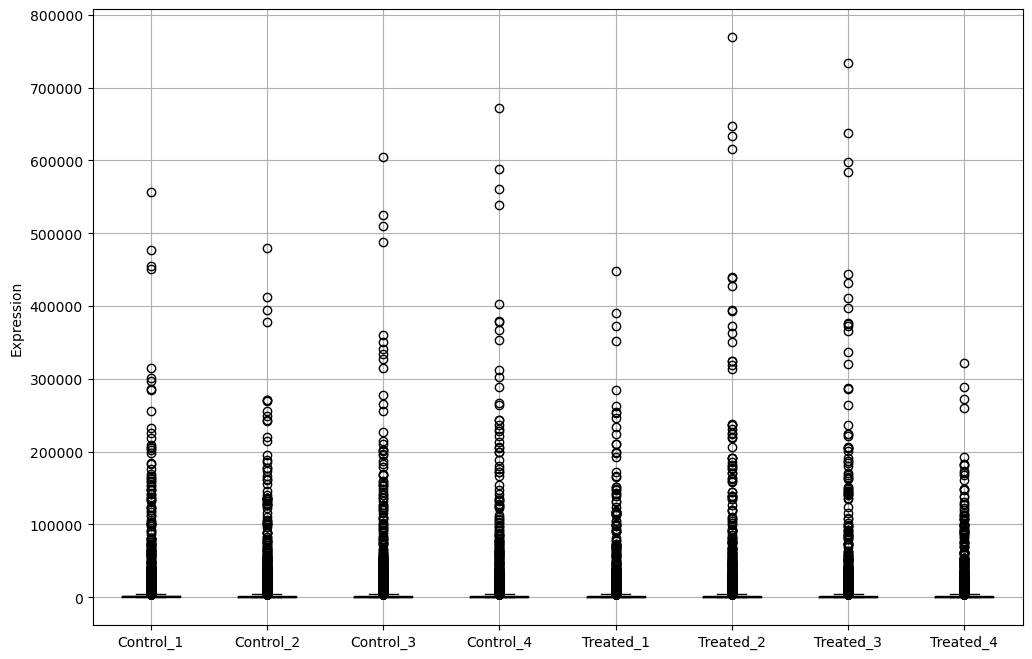

In [27]:
fig, axes = plt.subplots(figsize=(12,8))
ax = expression.boxplot(color='k')
ax.set_ylabel('Expression')

Podemos observar que la visualización de los datos Raw no proporciona información clara, ya que el rango es muy amplio, especificamente de 0 a 80000.

La comparación en este rango tiene muchas limitaciones, incluida la tendencia al sesgo de cálculos hacia numeros grandes.

Uno de los metodos de transformación más comunes aplicados a los datos de microarreglos es la transformación logarítmica.


/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


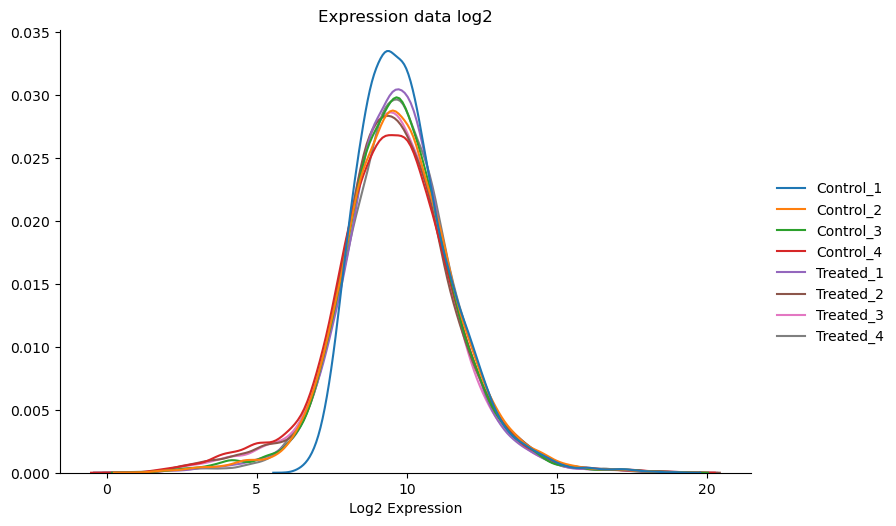

In [28]:
log_expression=np.log2(expression.iloc[:,1:])
fig=sns.displot(log_expression,  kind='kde', height=5, aspect=1.6)
plt.title("Expression data log2")
fig.set_axis_labels('Log2 Expression', '')

Podemos ver la distribución de las muestras limpias. La distribución ahora son comparables y la calidad de los datos es satisfactoria. Ahora podemos ver los boxplos para comparar los quantiles de las muestras.

Text(0, 0.5, 'Log2 Expression')

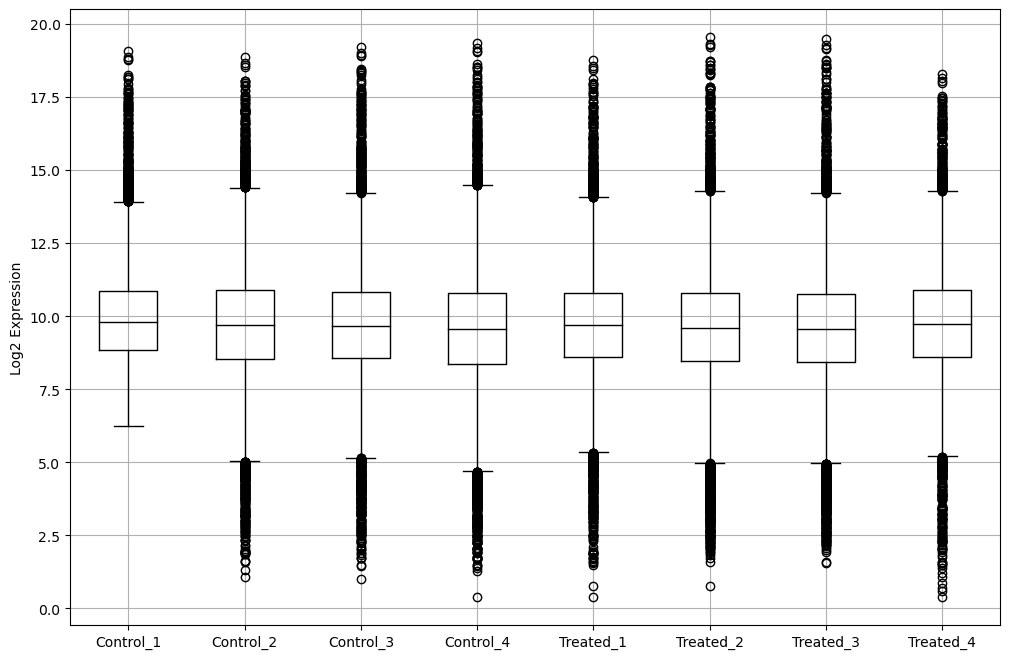

In [29]:
fig, axes = plt.subplots(figsize=(12,8))
ax = log_expression.boxplot(color='k')
ax.set_ylabel('Log2 Expression')

#### Normalización

Para comparar los datos, requerimos que las distribuciones sean lo más similares posible sin perder las variaciones entre si, este proceso se llama normalización.

La normalización de cuantiles es uno de los más utilizados para analizar datos de microarreglos.

1. Ordenamos cada columna por los valores mientras hacemos un seguimiento de los valores, específicamente, de qué filas se orginaron los valores.
2. Almacenamos los valores y calculamos el promedio para cada fila.
3. Reemplazamos el valor en cada fila con el valor promedio de cada fila.
4. Volvemos a colocar los valores en sus filas originales.

Esto transforma la nueva matriz de datos normalizados con la suma en todas las columnas.


In [30]:
def quantileNormalize(input):
    temp = input.copy()
    #compute rank
    dic = {}
    for col in temp:
        dic.update({col : sorted(temp[col])})
    sorted_df = pd.DataFrame(dic)
    rank = sorted_df.mean(axis = 1).tolist()
    #sort
    for col in temp:
        t = np.searchsorted(np.sort(temp[col]), temp[col])
        temp[col] = [rank[i] for i in t]
    return temp
Norm_samples=quantileNormalize(expression.iloc[:,1:])
Norm_samples

Control_1    Control_2    Control_3    Control_4    Treated_1  \
0        1690.3250     957.6500    1399.3875    1148.4500    1567.7625   
1         736.6500     492.1250     231.0500     673.5125     426.2500   
2         884.4500     896.8250     530.5125    1360.4500    1106.2500   
3         435.7000     678.8625     377.1500     616.9625     210.9375   
4        1416.9500    1365.9875    1340.7375    1956.2125    1469.4875   
...            ...          ...          ...          ...          ...   
16520  338827.9375  338827.9375  338827.9375  338827.9375  300324.4625   
16521  300324.4625  284672.4500  319862.6500  319862.6500  272576.7750   
16522  573472.2375  573472.2375  573472.2375  573472.2375  573472.2375   
16523  458600.5000  458600.5000  458600.5000  458600.5000  458600.5000   
16524      69.5000      73.7750      15.5000      63.9625      80.4125   

         Treated_2    Treated_3    Treated_4  
0        1657.0000    5001.5625    1915.5625  
1         459.1875     356.2875     239.6375  
2         814.8250    1246.3750     935.1875  
3         284.3875     483.1625     286.4875  
4        1924.3625     881.1000    1299.6375  
...            ...          ...          ...  
16520  338827.9375  319862.6500  319862.6500  
16521  308535.5750  300324.4625  272576.7750  
16522  573472.2375  573472.2375  573472.2375  
16523  458600.5000  458600.5000  458600.5000  
16524      72.6500     105.5750      24.3750  

[16525 rows x 8 columns]

Es bastante complicado entender la tabla anterior en términos de las diferencias después de la normalización. Por lo tanto lo mejor es visualizarlo.

/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


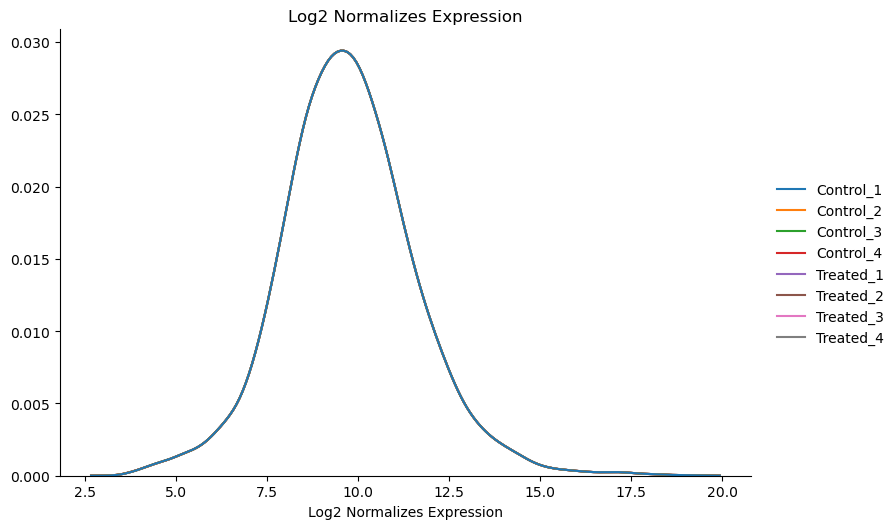

In [31]:
log_norm_expression = np.log2(Norm_samples)
fig=sns.displot(log_norm_expression,  kind='kde', height=5, aspect=1.6)
plt.title("Log2 Normalizes Expression")
fig.set_axis_labels('Log2 Normalizes Expression', '')

Podemos observar que todas las distribuciones son identicas y se sobrelapan una sobre otra despues de la normalización por cuantiles.


Normalmente en los microarreglos, los valores de expresión de cada gen se denominan características y las muestras son sus instancias. 
Generalmente ponemos las caracteristicas como columnas y las instancias como filas. Por lo tanto realizaremos la transpuesta de nuestro dataset.

In [32]:
expression_transpose = log_norm_expression.T
expression_transpose.info()
expression_transpose.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Control_1 to Treated_4
Columns: 16525 entries, 0 to 16524
dtypes: float64(16525)
memory usage: 1.0+ MB


0         1          2         3          4         5      \
Control_1  10.723085  9.524836   9.788637  8.767191  10.468573  8.263621   
Control_2   9.903355  8.942881   9.808683  9.406976  10.415729  8.187723   
Control_3  10.450580  7.852061   9.051243  8.558995  10.388811  8.257977   
Control_4  10.165472  9.395561  10.409868  9.269039  10.933847  9.161478   
Treated_1  10.614491  8.735556  10.111462  7.720672  10.521097  9.742730   

               6         7         8          9      ...      16515  \
Control_1   9.025659  9.553869  6.403225  10.918863  ...  15.319744   
Control_2   9.523390  8.288001  8.408011  10.262359  ...  14.908644   
Control_3   8.407162  8.923959  9.059987  10.705935  ...  15.424084   
Control_4  10.654714  8.357442  8.972908   9.131568  ...  15.613680   
Treated_1  10.074610  8.486081  8.186548   9.689845  ...  15.186129   

               16516      16517      16518      16519      16520      16521  \
Control_1  15.119303  15.219493  16.400238  16.424173  18.370193  18.196162   
Control_2  14.987716  15.075847  16.323480  16.292412  18.370193  18.118943   
Control_3  15.606708  15.595671  16.696069  16.602807  18.370193  18.287093   
Control_4  15.760358  15.743399  16.904966  16.880388  18.370193  18.287093   
Treated_1  15.251928  15.319744  14.816864  14.792094  18.196162  18.056303   

               16522      16523     16524  
Control_1  19.129364  18.806878  6.118941  
Control_2  19.129364  18.806878  6.205060  
Control_3  19.129364  18.806878  3.954196  
Control_4  19.129364  18.806878  5.999154  
Treated_1  19.129364  18.806878  6.329348  

[5 rows x 16525 columns]

Nuestro dataset tiene ocho filas y 16525 columnas, esto es un ejemplo de datos de alta dimensión es decir este conjunto tiene 16525 dimensiones.

Utilizaremos PCA para reducir su dimensión para visualizar los puntos de datos en un espacio 2D.

El primer paso es escalar los datos restando las medias y luego dividiendo esto por la desviación estandar.


In [33]:
#Estandarización
#Vamos a escalar los valores
expression_transpose_std = (expression_transpose-expression_transpose.mean()
                           )/expression_transpose.std()
#A veces, con datos reales, al escalar podemos obtener valores infinitos mientras dividimos con la desviación estandar
#En estos casos es probable que tengamos que excluir esos valores de nuesto dataset
#Por lo tanto vamos a convertit los valores infinitos en "NaN" y posteriormente los eliminamos usando ".dropna()"
expression_transpose_std = expression_transpose_std.replace(
    [np.inf, -np.inf], np.nan)
expression_transpose_std = expression_transpose_std.dropna(axis=1)



In [34]:
from sklearn.decomposition import PCA
#Ahora implementaremos PCA
sklearn_pca = PCA(n_components=2)
print(expression_transpose_std.shape)
PCs = sklearn_pca.fit_transform(expression_transpose)
print(PCs.shape)
print(sklearn_pca.explained_variance_ratio_)

(8, 16523)
(8, 2)
[0.20351873 0.18757078]


Podemos observar que que el conjunto de datos de 8 x 16525, se redujo a un dataset de 8 x 16521, de manera que se descartaron 4 porque producían valores infinitos durante el escalado.

Posteriomente al PCA, la dimension de nuestro dataset es de 8x2, esto conserva alrededor del 39% de las variaciones.

<Axes: xlabel='PC1', ylabel='PC2'>

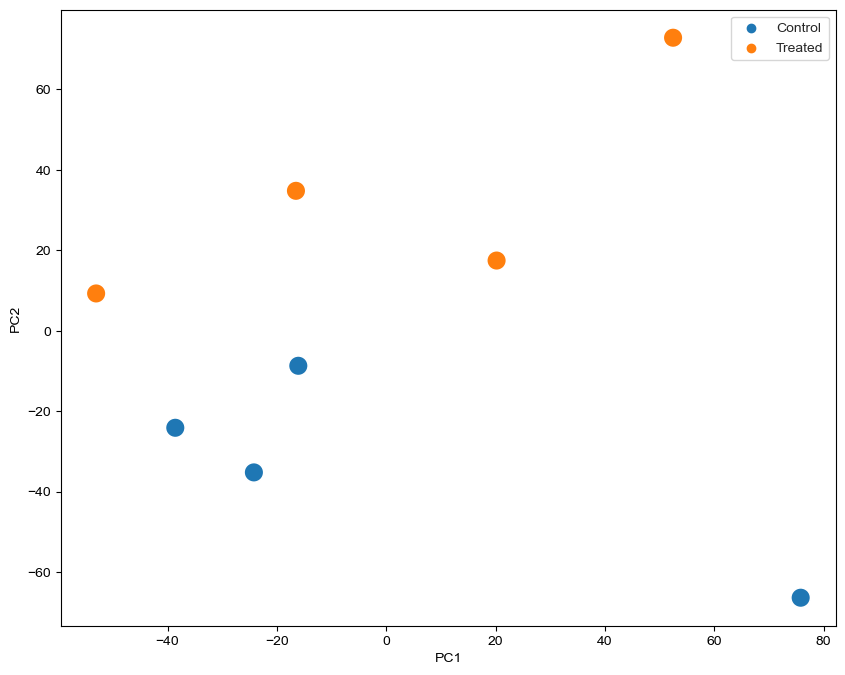

In [35]:
expression_PCs = pd.DataFrame(PCs,columns=['PC1','PC2'])
expression_PC1 = expression_PCs.set_index(np.array((['Control']*4)+['Treated']*4))
expression_PC2 = expression_PCs.set_index(expression_transpose.index)
fig, axes = plt.subplots(figsize=(10,8))
sns.set_style('whitegrid')
sns.scatterplot(x='PC1',y='PC2',data = expression_PC2, hue =expression_PC1.index, s=200)

El grafico de dos dimensiones contien una varianza del 39%, Podemos observar que los datos de control y tratamiento pueden separarse a través de una línea paralela a PC1 que pasa por el origen de PC2. 

Esto implican que los grupos de control y los grupos tratados son diferentes, y los datos son adecuados para observar las disparidades entre ellos para encontrar genes expresados diferencialmente.

En muchos casos, la visualización de PCA mostrará grupos de valores de control y tratados colocados claramente uno al lado del otro, lo que también implica que los datos son aplicables para un análisis posterior.

## Analisis de expresión diferencial

Para descubrir los genes expresados diferencialmente, se comparan los valores promedio de los grupos de control y tratamiento para cada gen, para análizar si el gen del tratamiento esta upregulated o downregulated con respecto al gen control.
La validación estadistica de esta comparación es por medio de una prueba estadistica llamada t de student.

La prueba t se utiliza para comparar medias de muestas. Proporciona un valor p, que es la probabilidad estimada de rechazar la hipótesis nula. Por lo tanto, un valor p más bajo implica que existe una diferencia signifiativa entre las expresiones de un gen en dos conjuntos de datos. Un valor de P inferior a 0.05 es estadísticamente significativo.

Después de determinar que la expresión génetica es significativamente diferente entre los conjuntos de muestras, calculamos el cambio en la expresión restando los valores transformados log2 de las intensidades del control con el tratamiento, o el cambio Log2 Fold. Si el resultado es un valor positivo se dice que el gen esta upregulated. Por el contrario si el resultado es negativoa, entonces se llamaría downregulated. 

In [36]:
from scipy import stats
control_mean = log_norm_expression.iloc[:,:4].mean(axis=1)
treated_mean = log_norm_expression.iloc[:,4:].mean(axis=1)

compair_means=pd.DataFrame(columns=['Control_Mean','Treated_mean'])
compair_means['Control_Mean']=control_mean
compair_means['Treated_mean']=treated_mean
compair_means['log2_fold_change'] = (compair_means['Treated_mean']-
                                     compair_means['Control_Mean'])
                                     

t_tset_values = pd.DataFrame(stats.ttest_ind(
    log_norm_expression.iloc[:,:4],log_norm_expression.iloc[:,4:],axis=1)).T

t_tset_values.columns = ['Stastics','Pvalue']

compair_means = pd.concat([expression.iloc[:,0],compair_means,t_tset_values],axis=1)
compair_means.head()


/Users/galanve/anaconda3/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:618: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


ID_REF  Control_Mean  Treated_mean  log2_fold_change  Stastics  \
0     1007_s_at     10.310623     11.125141          0.814518 -1.891712   
1        121_at      8.928835      8.490026         -0.438809  1.011076   
2       1316_at      9.764608      9.983611          0.219003 -0.708891   
3  1552257_a_at      9.000550      8.237770         -0.762780  2.384782   
4  1552264_a_at     10.551740     10.389579         -0.162161  0.607118   

     Pvalue  
0  0.107397  
1  0.351002  
2  0.504990  
3  0.054412  
4  0.566024

In [37]:
#Ahora uniremos lestos datos con la tabla de anotación
merged_table = pd.merge(annotation,compair_means,on='ID_REF')
merged_table.head()

ID_REF     GB_ACC       Gene Symbol     ENTREZ_GENE_ID  Control_Mean  \
0     1007_s_at     U48705  DDR1 /// MIR4640  780 /// 100616237     10.310623   
1        121_at     X69699              PAX8               7849      8.928835   
2       1316_at     X55005              THRA               7067      9.764608   
3  1552257_a_at  NM_015140            TTLL12              23170      9.000550   
4  1552264_a_at  NM_138957             MAPK1               5594     10.551740   

   Treated_mean  log2_fold_change  Stastics    Pvalue  
0     11.125141          0.814518 -1.891712  0.107397  
1      8.490026         -0.438809  1.011076  0.351002  
2      9.983611          0.219003 -0.708891  0.504990  
3      8.237770         -0.762780  2.384782  0.054412  
4     10.389579         -0.162161  0.607118  0.566024

In [38]:
#El siguiente paso es filtrar las filas con genes que están significativamente upregulated o downregulated con valor p ≤ 0.05

significant_table = merged_table[merged_table['Pvalue']<=0.05]
significant_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 23 to 16496
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_REF            1251 non-null   object 
 1   GB_ACC            1250 non-null   object 
 2   Gene Symbol       1119 non-null   object 
 3   ENTREZ_GENE_ID    1100 non-null   object 
 4   Control_Mean      1251 non-null   float64
 5   Treated_mean      1251 non-null   float64
 6   log2_fold_change  1251 non-null   float64
 7   Stastics          1251 non-null   float64
 8   Pvalue            1251 non-null   float64
dtypes: float64(5), object(4)
memory usage: 97.7+ KB


In [39]:
significant_table.head()

ID_REF     GB_ACC Gene Symbol ENTREZ_GENE_ID  Control_Mean  \
23  1552439_s_at  NM_032445      MEGF11          84465      7.142332   
25    1552455_at  NM_138818      PRUNE2         158471      7.957190   
29    1552498_at  NM_145238     ZSCAN20           7579      7.676399   
45  1552627_a_at  NM_001173     ARHGAP5            394      9.822314   
47  1552656_s_at  NM_144624       UHMK1         127933      9.814447   

    Treated_mean  log2_fold_change  Stastics    Pvalue  
23      7.819578          0.677245 -3.219326  0.018153  
25      8.936062          0.978872 -3.187801  0.018889  
29      8.627494          0.951095 -2.671490  0.036953  
45     10.425121          0.602807 -2.642834  0.038395  
47      8.865032         -0.949415  3.759277  0.009407

In [40]:
volcangraph=merged_table

In [41]:
volcangraph=significant_table
# Agregar columna de -log10(pvalue)
volcangraph["-log10_pvalue"] = -np.log10(volcangraph["Pvalue"])

/var/folders/0j/lsgw_9pn4jb8tydzmww2k9c40000gn/T/ipykernel_74937/2135917282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volcangraph["-log10_pvalue"] = -np.log10(volcangraph["Pvalue"])


In [42]:
# Parámetros de corte
pval_thresh = 0.05
logfc_thresh = 1.5

# Crear columna para colorear puntos
significant_table["significant"] = "No significativo"
significant_table.loc[(significant_table["Pvalue"] < pval_thresh) & (significant_table["log2_fold_change"] > logfc_thresh), "significant"] = "Up-regulated"
significant_table.loc[(significant_table["Pvalue"] < pval_thresh) & (significant_table["log2_fold_change"] < -logfc_thresh), "significant"] = "Down-regulated"

/var/folders/0j/lsgw_9pn4jb8tydzmww2k9c40000gn/T/ipykernel_74937/147127117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_table["significant"] = "No significativo"


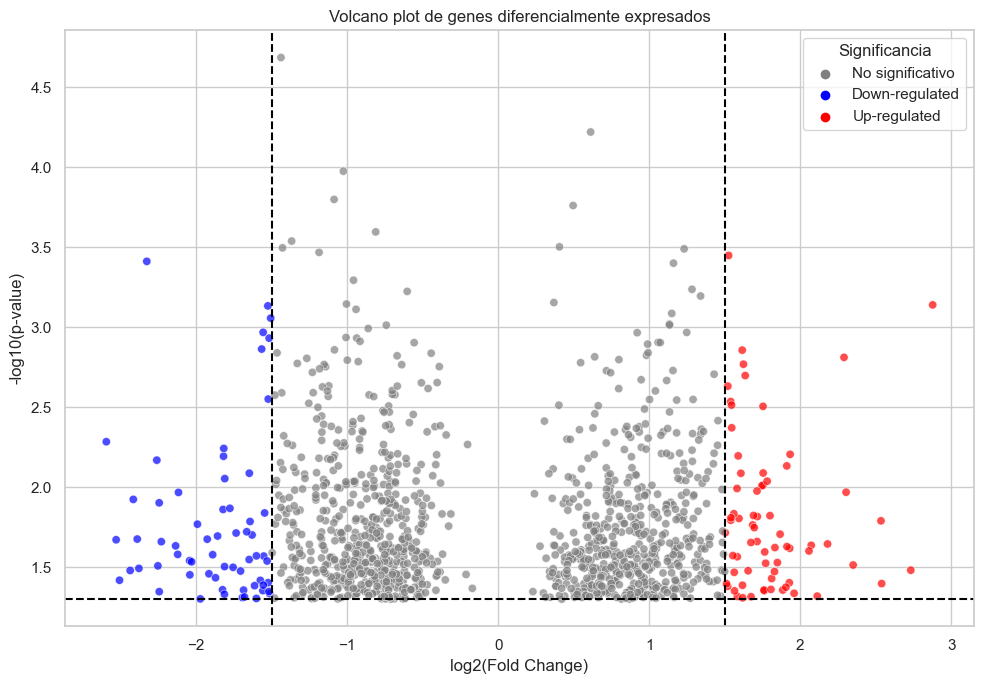

In [43]:
import matplotlib.pyplot as plt

# Configurar estilos
sns.set(style="whitegrid")

# Volcano plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=significant_table, x="log2_fold_change", y="-log10_pvalue", hue="significant",
                palette={"Up-regulated": "red", "Down-regulated": "blue", "No significativo": "gray"},
                alpha=0.7)

# Líneas de corte
plt.axhline(-np.log10(pval_thresh), color='black', linestyle='--')
plt.axvline(logfc_thresh, color='black', linestyle='--')
plt.axvline(-logfc_thresh, color='black', linestyle='--')

# Etiquetas y título
plt.title("Volcano plot de genes diferencialmente expresados")
plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(p-value)")
plt.legend(title="Significancia")
plt.tight_layout()
plt.show()

In [44]:
significant_table

ID_REF     GB_ACC Gene Symbol ENTREZ_GENE_ID  Control_Mean  \
23        1552439_s_at  NM_032445      MEGF11          84465      7.142332   
25          1552455_at  NM_138818      PRUNE2         158471      7.957190   
29          1552498_at  NM_145238     ZSCAN20           7579      7.676399   
45        1552627_a_at  NM_001173     ARHGAP5            394      9.822314   
47        1552656_s_at  NM_144624       UHMK1         127933      9.814447   
...                ...        ...         ...            ...           ...   
16459         57588_at     R62432     SLC24A3          57419     10.976829   
16466       60794_f_at   AI400621      ZNF814         730051      9.539324   
16473         63825_at   AI557319       ABHD2          11057      9.409691   
16474       64408_s_at   AW025529      CALML4          91860      8.053860   
16496  AFFX-BioDn-3_at        NaN         NaN            NaN     17.937230   

       Treated_mean  log2_fold_change  Stastics    Pvalue  -log10_pvalue  \
23         7.819578          0.677245 -3.219326  0.018153       1.741062   
25         8.936062          0.978872 -3.187801  0.018889       1.723797   
29         8.627494          0.951095 -2.671490  0.036953       1.432349   
45        10.425121          0.602807 -2.642834  0.038395       1.415729   
47         8.865032         -0.949415  3.759277  0.009407       2.026571   
...             ...               ...       ...       ...            ...   
16459     10.014528         -0.962302  4.551015  0.003888       2.410312   
16466     10.469352          0.930028 -2.725718  0.034381       1.463684   
16473     10.013820          0.604130 -2.474173  0.048184       1.317094   
16474      9.084803          1.030942 -2.995260  0.024156       1.616983   
16496     17.734014         -0.203216  4.247482  0.005395       2.268001   

            significant  
23     No significativo  
25     No significativo  
29     No significativo  
45     No significativo  
47     No significativo  
...                 ...  
16459  No significativo  
16466  No significativo  
16473  No significativo  
16474  No significativo  
16496  No significativo  

[1251 rows x 11 columns]

Obtuvimos 1251 genes de este tipo que se expresan de manera diferencial significativamente. A continuación, colocamos un límite en los valores de log2 fold change para producir valores más estrictos. Este corte depende de los experimentos y resultados y puede variar entre ±1 y ±2. En este paso, tomamos ±1,5 (es decir, más de 1,5 y menos de −1,5) log2 veces el cambio.

In [45]:
Upregulated_genes = significant_table[
    significant_table['log2_fold_change']>1.5]
Downregulated_genes = significant_table[
    significant_table['log2_fold_change']<-1.5]
print('Upregulated Genes')
Upregulated_genes.info()
print('\nDownregulated Genes')
Downregulated_genes.info()

Upregulated Genes
<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 136 to 16178
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_REF            69 non-null     object 
 1   GB_ACC            69 non-null     object 
 2   Gene Symbol       47 non-null     object 
 3   ENTREZ_GENE_ID    46 non-null     object 
 4   Control_Mean      69 non-null     float64
 5   Treated_mean      69 non-null     float64
 6   log2_fold_change  69 non-null     float64
 7   Stastics          69 non-null     float64
 8   Pvalue            69 non-null     float64
 9   -log10_pvalue     69 non-null     float64
 10  significant       69 non-null     object 
dtypes: float64(6), object(5)
memory usage: 6.5+ KB

Downregulated Genes
<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 71 to 16262
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  

Obtenemos 69 genes upregulated y 63 downregulated. Ahora consolidadmos la tabla de genes expresados diferencialmente.

In [46]:
DEGs = pd.concat([Upregulated_genes,Downregulated_genes])
DEGs.head()

ID_REF     GB_ACC Gene Symbol ENTREZ_GENE_ID  Control_Mean  \
136    1553253_at  NM_080863       ASB16          92591      7.767619   
235    1553954_at   BU682208       ALG14         199857      6.503933   
259  1554043_a_at   BC012528         NaN            NaN      6.857222   
381    1554772_at   BC036407     EFCAB13         124989      8.644272   
425    1555118_at   BC029869      ENTPD3            956      5.923432   

     Treated_mean  log2_fold_change  Stastics    Pvalue  -log10_pvalue  \
136      9.307180          1.539562 -3.317525  0.016054       1.794425   
235      8.086674          1.582741 -2.476600  0.048026       1.318523   
259      8.667420          1.810198 -2.667561  0.037147       1.430073   
381     10.226655          1.582383 -2.905322  0.027145       1.566304   
425      7.722591          1.799159 -3.371086  0.015022       1.823264   

      significant  
136  Up-regulated  
235  Up-regulated  
259  Up-regulated  
381  Up-regulated  
425  Up-regulated

### Ahora vamos a recuperar los datos de expresión utilizando los genes diferencialmente expresados

In [47]:
log_expression=pd.concat([expression.iloc[:,0],log_expression],axis=1)
table = pd.merge(DEGs.iloc[:,:3],log_expression,on='ID_REF')
table=table.drop(['ID_REF', 'GB_ACC'], axis=1)
table.head()

Gene Symbol  Control_1  Control_2  Control_3  Control_4  Treated_1  \
0       ASB16   8.163398   7.315602   7.305606   8.657140   9.642052   
1       ALG14   7.779391   7.172927   3.944858   6.507795   7.837943   
2         NaN   8.587215   7.062856   6.277985   4.336283   8.104861   
3     EFCAB13   8.820179   9.316734   9.170426   7.210428   9.704077   
4      ENTPD3   7.830990   4.209453   6.137504   4.078951   7.001127   

   Treated_2  Treated_3  Treated_4  
0   8.896332   9.869440   8.719047  
1   8.327777   8.751544   7.235536  
2   8.756223   9.707532   7.955940  
3  10.421329  11.122569   9.643676  
4   7.326429   8.431289   7.835419

El conjunto de datos DEG contiene la columna como números de acceso de GenBank, y el resto de las ocho columnas presentan los valores de expresión de los cuatro controles y las cuatro muestras tratadas.

In [49]:
table.describe()

Control_1   Control_2   Control_3   Control_4   Treated_1   Treated_2  \
count  132.000000  132.000000  132.000000  132.000000  132.000000  132.000000   
mean     9.070583    8.508938    8.248652    8.055377    8.402029    8.117435   
std      1.278072    1.767599    2.001190    2.197749    2.200985    2.345779   
min      6.685099    3.277985    1.722466    2.485427    1.887525    2.201634   
25%      8.120952    7.395747    7.269044    6.651550    7.097323    6.638132   
50%      8.827167    8.312169    8.144647    8.276980    8.735816    8.513519   
75%      9.985888    9.699045    9.618288    9.548193    9.843254    9.802632   
max     12.353533   12.883617   12.502359   12.716798   12.905443   13.301425   

        Treated_3   Treated_4  
count  132.000000  132.000000  
mean     8.295692    8.542134  
std      2.321438    2.100473  
min      2.201634    2.104337  
25%      6.978917    7.448343  
50%      8.680008    8.907190  
75%      9.870595    9.726872  
max     13.024049   12.892391

Hay 132 genes, que deben agruparse en función de su expresión en una condición particular (es decir, tratados con control)

In [52]:
table

Gene Symbol  Control_1  Control_2  Control_3  Control_4  Treated_1  \
0           ASB16   8.163398   7.315602   7.305606   8.657140   9.642052   
1           ALG14   7.779391   7.172927   3.944858   6.507795   7.837943   
2             NaN   8.587215   7.062856   6.277985   4.336283   8.104861   
3         EFCAB13   8.820179   9.316734   9.170426   7.210428   9.704077   
4          ENTPD3   7.830990   4.209453   6.137504   4.078951   7.001127   
..            ...        ...        ...        ...        ...        ...   
127     LOC389895   9.385431   7.949535   6.525129   5.794416   3.536053   
128           NaN  10.133142   8.757557   8.139040   8.221104   6.449561   
129           NaN   8.291861   5.472488   7.738092   8.714246   4.802193   
130  RP11-250B2.3   7.778077   7.261155   5.378512   7.559951   5.507795   
131           NaN   8.071999   7.431289   7.793766   6.066089   6.068241   

     Treated_2  Treated_3  Treated_4  
0     8.896332   9.869440   8.719047  
1     8.327777   8.751544   7.235536  
2     8.756223   9.707532   7.955940  
3    10.421329  11.122569   9.643676  
4     7.326429   8.431289   7.835419  
..         ...        ...        ...  
127   2.536053   3.307429   7.072535  
128   7.652486   6.373300   7.218200  
129   4.678072   5.346957   5.289097  
130   3.053111   5.141596   4.862947  
131   4.314697   2.201634   6.791814  

[132 rows x 9 columns]

El conjunto de datos no contiene valores nulos. A continuación, separaremos los valores de expresión de las muestras tratadas. Hay cuatro valores de expresión para cada gen en la condición tratada, por lo tanto, cuatro características para cada gen

In [51]:
new_data=table.iloc[:,5:]
new_data.head()

Treated_1  Treated_2  Treated_3  Treated_4
0   9.642052   8.896332   9.869440   8.719047
1   7.837943   8.327777   8.751544   7.235536
2   8.104861   8.756223   9.707532   7.955940
3   9.704077  10.421329  11.122569   9.643676
4   7.001127   7.326429   8.431289   7.835419

Usando el método del codo, determinaremos el valor óptimo de k.

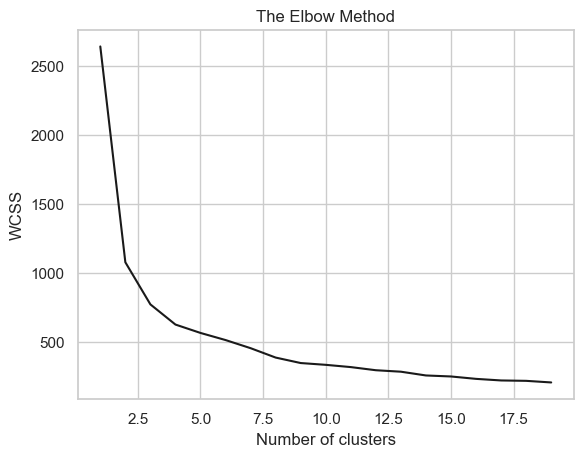

In [53]:
wcss = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 150)
  kmeans.fit(new_data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss,color='k')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Según el método del codo, es probable que el número de grupos óptimos sea ocho

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,init = 'k-means++', random_state=150)
kmeans.fit(new_data)

KMeans(random_state=150)

In [55]:
kmeans.labels_

array([2, 4, 2, 1, 4, 1, 6, 2, 6, 4, 7, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 7,
       2, 6, 6, 1, 1, 2, 2, 1, 1, 5, 1, 4, 4, 4, 2, 2, 2, 6, 1, 6, 4, 2,
       2, 1, 1, 4, 2, 6, 4, 4, 1, 1, 1, 1, 2, 4, 1, 2, 2, 1, 6, 1, 2, 4,
       2, 5, 6, 3, 1, 5, 5, 7, 0, 3, 3, 5, 3, 2, 3, 5, 7, 1, 4, 7, 3, 4,
       4, 4, 0, 7, 1, 4, 3, 3, 0, 4, 0, 4, 1, 4, 1, 0, 4, 4, 0, 5, 1, 3,
       4, 7, 4, 3, 0, 2, 2, 4, 4, 7, 0, 7, 1, 5, 7, 4, 5, 3, 5, 3, 3, 3],
      dtype=int32)

En el siguiente paso, asignaremos los números de grupo recuperados en el paso anterior a los ID de acceso de GenBank.

In [57]:
cluster_genes = pd.concat([table.iloc[:,0],pd.DataFrame(kmeans.labels_)],axis=1)
cluster_genes.columns= ['GB_ACC','Groups']
cluster_genes

GB_ACC  Groups
0           ASB16       2
1           ALG14       4
2             NaN       2
3         EFCAB13       1
4          ENTPD3       4
..            ...     ...
127     LOC389895       3
128           NaN       5
129           NaN       3
130  RP11-250B2.3       3
131           NaN       3

[132 rows x 2 columns]

A partir de aquí, los genes se agrupan en grupos respectivos utilizando la "groupby function" de dataframe de Pandas, que toma el nombre de la columna en función de dónde el usuario desea agrupar los datos.

In [58]:
cluster = cluster_genes.groupby('Groups')
cluster.describe()

GB_ACC                       
        count unique        top freq
Groups                              
0           8      8       BIN3    1
1          21     21    EFCAB13    1
2          18     18      ASB16    1
3          12     12      HDAC9    1
4          24     24      ALG14    1
5           7      7      OLFM3    1
6           7      7  LOC441081    1
7           9      9     HIVEP1    1

Podemos ver que el grupo 3 tiene el mayor número de genes.

Podemos recuperar los elementos de un grupo en partícular.

In [59]:
cluster = {k: v for k, v in cluster_genes.groupby('Groups')}
cluster[1]

GB_ACC  Groups
3                                             EFCAB13       1
5                                               HIF3A       1
13                                                NaN       1
14                                                NaN       1
17                                              WWTR1       1
20                                            SLC14A1       1
25                                            TGFB1I1       1
26                                             SPTSSA       1
29                                              GPR37       1
30                                               CD44       1
32                                               TNS1       1
40                                                 CP       1
45                                                NaN       1
46                                                NaN       1
52                                              STON2       1
53                                                QKI       1
54                                               LIX1       1
55                                              ARMC8       1
58                                                NaN       1
61                                                NaN       1
63                                                NaN       1
70                                          LINC00889       1
83   TMEM189 /// TMEM189-UBE2V1 /// UBE2V1 /// UBE2V2       1
92                                              RPH3A       1
100                                              KRAS       1
102                                             SKAP2       1
108                                            SEMA6B       1
122                                              MAP4       1

In [60]:
import seaborn as sns
from sklearn.manifold import TSNE


## T- distributed Stochastic Neighbor Embedding (T-SNE)

- Es una técnica de reducción de dimensiones no parametrica en el que los datos de altadimensionalidad son proyectados a un espacio de menor dimensión, mientras preserva las relaciones entre los puntos de los datos originales de alta dimensionalidad.

- Este fue introducido por Maaten y Hinton en 2008.

<img src="../Imagen/T-SNE.png" width="600" height="350"/>




### Definición
Supongamos que tenemos una serie de observaciones $X_1,...,X_n$ en la que cada observación pertenece a un espacio dimensionalmente grande es decir $X_i\in \Re ^P$ con $P$ mucho mayor que 2.

Queremos hallar una representación de las $n$ observaciones en un espacio menor, es decir, buscamos $Y_1,...Y_n$ en la que cada observación pertenece a un espacio menor, es decir $Y_i\in \Re ^d$ con $d$ igual a 2 o 3.

El objetivo es presevar lo mejor posible ciertas características de la muestra en el espacio original.

### Aplicaciones
- Visualización
- Análisis exploratorio
- Preprocesamiento de datos
- Selección de características
- Inicialización para otros algoritmos
- Comparación de conjuntos de datos
- Detección de anomalías

In [61]:
clusters = kmeans.fit_predict(new_data)
# Aplicar t-SNE para reducir la dimensionalidad a 2D
tsne = TSNE(n_components=2, random_state=150, perplexity=10)
tsne_results = tsne.fit_transform(new_data)

In [62]:
# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Cluster'] = clusters

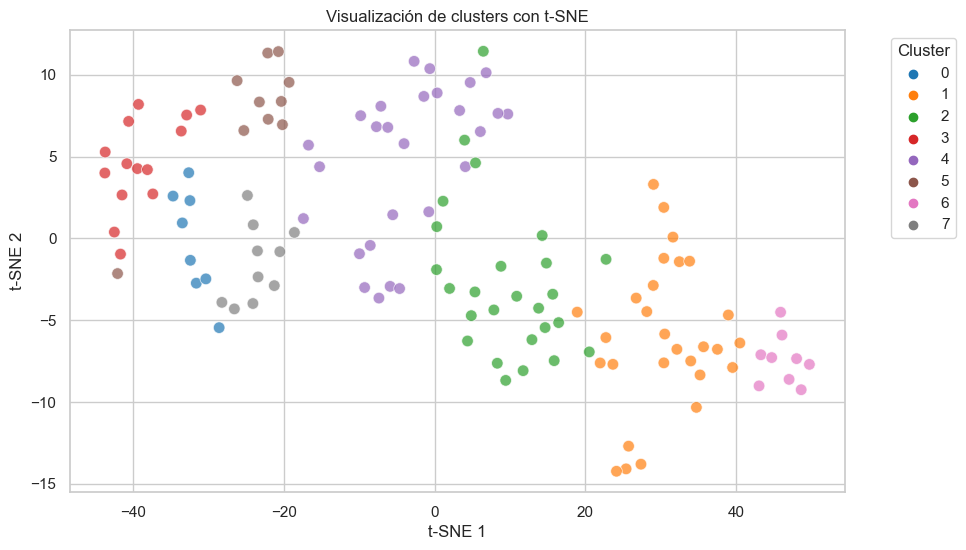

In [63]:
# Visualización de los clusters con t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='t-SNE 1', y='t-SNE 2', hue=tsne_df['Cluster'],
                palette='tab10', s=70, alpha=0.7, edgecolors='k')
plt.title('Visualización de clusters con t-SNE')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='t-SNE 1', ylabel='t-SNE 2'>

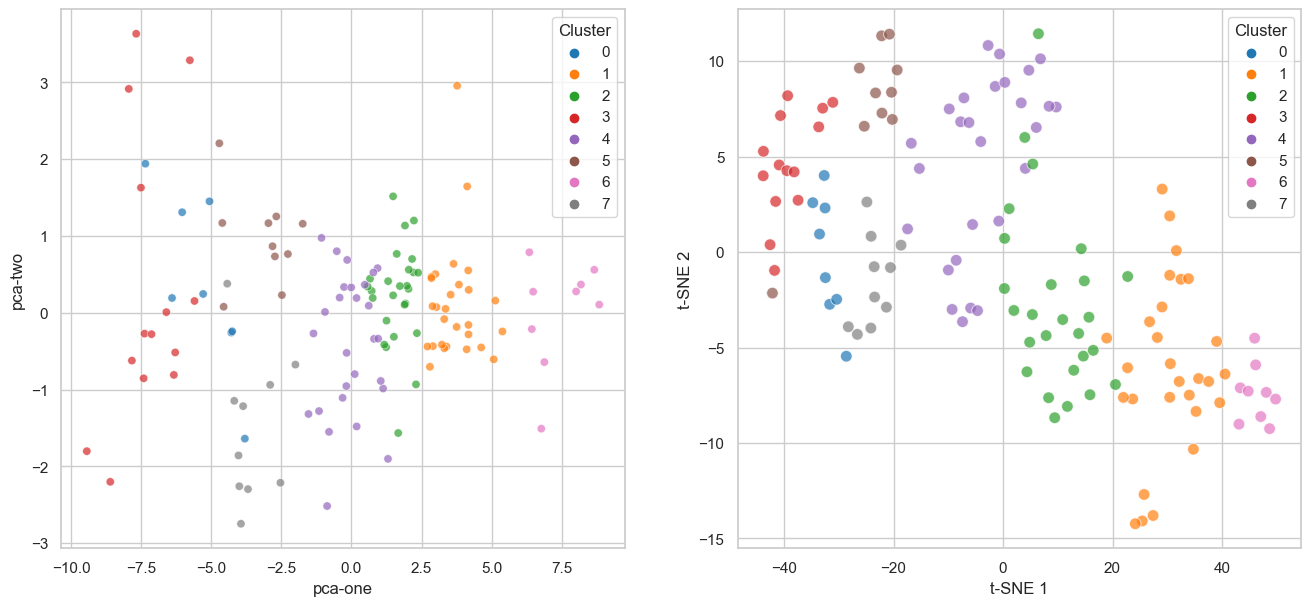

In [64]:
#Aplicamos PCA con tres componentes para verificar como se comporta las varianzas explicadas.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(new_data)

tsne_df['pca-one'] = pca_result[:,0]
tsne_df['pca-two'] = pca_result[:,1]

# Comparamos PCA y TSNE
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=tsne_df['Cluster'],
    palette='tab10',
    data=tsne_df,
    alpha=0.7,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    data=tsne_df,
    x='t-SNE 1', y='t-SNE 2',
    hue=tsne_df['Cluster'],
    palette='tab10', s=70, alpha=0.7,
    edgecolors='k',
    ax=ax2)


## Factorización No Negativa de Matrices


- Un problema bastante extendido en diferentes técnicas de análisis de datos consiste en encontrar una representación adecuada de los datos.
- Un tipo de representación de gran utilidad será aquella que permita reducir las dimensiones de los datos a la vez que muestra ciertas características del conjunto de éstos que permanezcan ocultas a priori.
- NMF es una técnica de reciente creación cuya principal utilidad consiste en encontrar una representación lineal de los datos, que han de ser no negativos.

Dada una matriz no negativa $A$, se puede encontrar los factores de la matriz no negativos $W$ y $H$

Para una matriz $A$ de $mxn$ dimensiones, donde cada elemento es $\geq 0$, NMF puede factorizarla en dos matrices $W$ y $H$, que tienen dimensiones de $mxk$ y $kxn$ respectivamente, estas dos matrices solo contienen elementos no-negativos.


<img src="../Imagen/NMF3.jpeg" width="600" height="350"/>

- $A$ es la matriz original
- $W$ es la matriz de características
- $H$ es la matriz de coeficientes (Pesos asociados a $W$)
- $k$ Aproximación de rango bajo de $A$ ($k\geq min(m,n)$)

### Como funciona?

- NMF descompone datos multivariados mediante la creación de un número de características definido por el usuario.
Cada característica es una combinación lineal del conjunto de atributos original; los coeficientes de estas combinaciones lineales no son negativos.

- NMF descompone una matriz de datos $A$ en el producto de dos matrices de rango inferior $W$ y $H$ para que $A$ sea aproximadamente igual a $W$ por $H$.

- NMF usa un procedimiento iterativo para modificar los valores iniciales de $W$ y $H$ para que el producto se acerque a $A$.

- El procedimiento termina cuando el error de aproximación converge o se alcanza el número especificado de iteraciones.

## Aplicación

- Procesamiento de imágenes
<img src="../Imagen/NMF1.png" width="600" height="350"/>


- Minería de textos
<img src="../Imagen/NMF2.png" width="600" height="350"/>



### Ahora vamos a trabajar con el datset de datos de expresión

In [65]:

import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet

In [66]:
dataset = pd.read_csv('../Datos/Sesiones/DEGs.csv', index_col=0)
dataset.head()

Control_1  Control_2  Control_3  Control_4  Treated_1  Treated_2  \
GB_ACC                                                                        
NM_080863   8.163398   7.315602   7.305606   8.657140   9.642052   8.896332   
BU682208    7.779391   7.172927   3.944858   6.507795   7.837943   8.327777   
BC012528    8.587215   7.062856   6.277985   4.336283   8.104861   8.756223   
BC036407    8.820179   9.316734   9.170426   7.210428   9.704077  10.421329   
BC029869    7.830990   4.209453   6.137504   4.078951   7.001127   7.326429   

           Treated_3  Treated_4  
GB_ACC                           
NM_080863   9.869440   8.719047  
BU682208    8.751544   7.235536  
BC012528    9.707532   7.955940  
BC036407   11.122569   9.643676  
BC029869    8.431289   7.835419

In [67]:
X = dataset.values  # Convertir a matriz numpy

# Máximo valor de k permitido
max_k = min(X.shape)  # min(n_genes, n_muestras)
componentes = list(range(2, max_k))  # Rango válido de valores de k
cophenetic_scores = []
valid_k = []  # Lista para almacenar los valores de k que sí funcionaron


In [68]:
for k in componentes:
    try:
        nmf = NMF(n_components=k, init="nndsvda", random_state=42)  # Usamos "nndsvda" por estabilidad
        W = nmf.fit_transform(X)

        # Calcular matriz de distancia entre las representaciones latentes
        dist_matrix = pdist(W, metric='euclidean')

        # Calcular matriz cophenética usando clustering jerárquico
        linkage_matrix = linkage(dist_matrix, method='average')
        cophenet_corr, _ = cophenet(linkage_matrix, dist_matrix)

        # Guardar resultados
        cophenetic_scores.append(cophenet_corr)
        valid_k.append(k)  # Guardar solo los valores de k válidos
    except ValueError as e:
        print(f"Skipping k={k}: {e}")

/Users/galanve/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


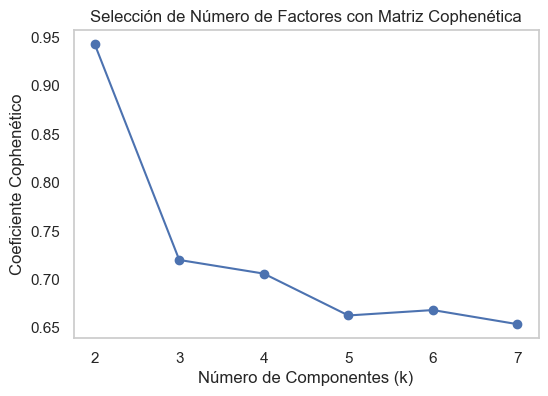

In [69]:
# Graficar coeficiente cofenético vs número de componentes
plt.figure(figsize=(6,4))
plt.plot(valid_k, cophenetic_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Número de Componentes (k)")
plt.ylabel("Coeficiente Cophenético")
plt.title("Selección de Número de Factores con Matriz Cophenética")
plt.grid()
plt.show()

In [70]:
# Separar los controles y las réplicas de análisis
controles = dataset.iloc[:, :4]  # Primeras 4 columnas
replicas = dataset.iloc[:, 4:8]  # Últimas 4 columnas

In [71]:
# Unir ambos grupos en una sola matriz de datos para NMF
X = dataset.values  # Convertir a matriz numpy


In [72]:
# Aplicar NMF con un número de componentes (ajusta según tu análisis)
n_components = 2  # Puedes cambiar el número de factores latentes
nmf = NMF(n_components=n_components, init="nndsvd", random_state=42)
W = nmf.fit_transform(X)  # Matriz base (genes x componentes)
H = nmf.components_  # Matriz de coeficientes (componentes x muestras)


/Users/galanve/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [73]:
# Convertir en DataFrames para mejor interpretación
W_df = pd.DataFrame(W, index=dataset.index, columns=[f"Componente_{i+1}" for i in range(n_components)])
H_df = pd.DataFrame(H, columns=dataset.columns, index=[f"Componente_{i+1}" for i in range(n_components)])


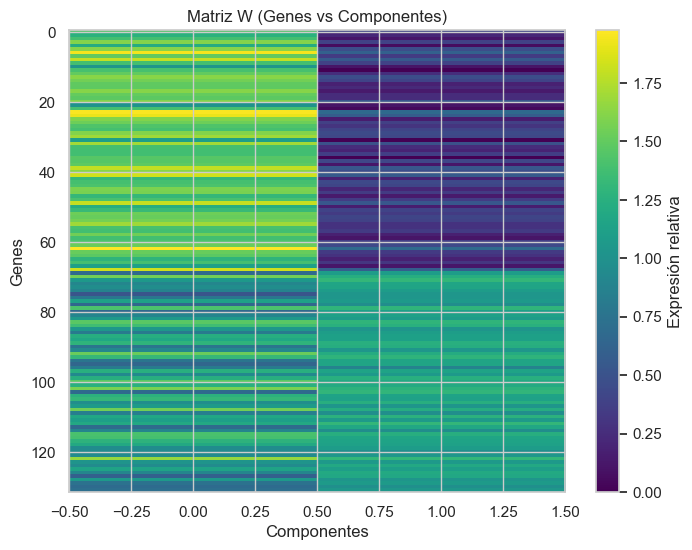

In [74]:
# Graficar la matriz W (genes vs componentes)
plt.figure(figsize=(8, 6))
plt.imshow(W, aspect="auto", cmap="viridis")
plt.colorbar(label="Expresión relativa")
plt.xlabel("Componentes")
plt.ylabel("Genes")
plt.title("Matriz W (Genes vs Componentes)")
plt.show()

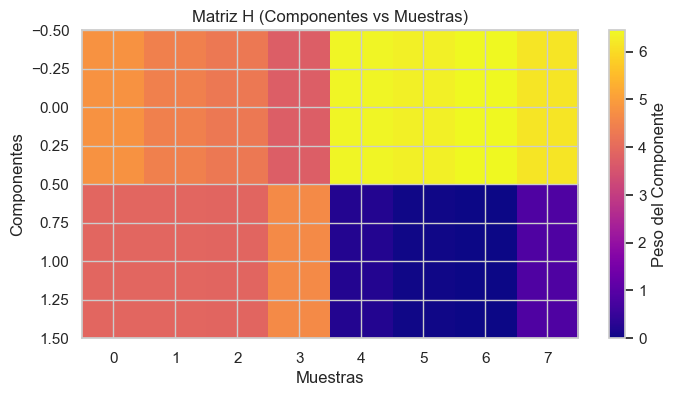

In [75]:
# Graficar la matriz H (componentes vs muestras)
plt.figure(figsize=(8, 4))
plt.imshow(H, aspect="auto", cmap="plasma")
plt.colorbar(label="Peso del Componente")
plt.xlabel("Muestras")
plt.ylabel("Componentes")
plt.title("Matriz H (Componentes vs Muestras)")
plt.show()

In [76]:
!pip install gseapy

In [77]:
import gseapy as gp

In [79]:
annotation = pd.read_csv('../Datos/Sesiones/annotation_file.csv')
#Annotation File Contains
annotation.head()

ID_REF  GB_ACC       Gene Symbol     ENTREZ_GENE_ID
0  1007_s_at  U48705  DDR1 /// MIR4640  780 /// 100616237
1    1053_at  M87338              RFC2               5982
2     117_at  X51757             HSPA6               3310
3     121_at  X69699              PAX8               7849
4  1255_g_at  L36861            GUCA1A               2978

In [80]:
# Diccionario para mapear los nombres de los genes a sus símbolos
mapa_genes = annotation.set_index("GB_ACC")["Gene Symbol"].to_dict()

In [81]:
# Seleccionar los genes más importantes en cada factor
top_n = 10  # Cambia este valor si quieres más genes
genes_importantes = {}

In [82]:
for factor in W_df.columns:
    top_genes = W_df[factor].nlargest(top_n).index  # Obtener los genes con mayor peso
    genes_importantes[factor] = top_genes.tolist()


In [83]:
# Crear un diccionario con listas de símbolos génicos por cada factor
genes_simbolos = {}

for factor, genes in genes_importantes.items():
    genes_simbolos[factor] = [mapa_genes.get(gene, "Unknown") for gene in genes]

# Mostrar los símbolos génicos de los genes más importantes por cada factor
for factor, simbolos in genes_simbolos.items():
    print(f"\n🔹 Genes más importantes en {factor}:")
    print(simbolos)

    # Filtrar genes "Unknown" y NaN para evitar errores en el análisis de enriquecimiento
    simbolos_filtrados = [g for g in simbolos if g != "Unknown" and pd.notna(g)]

    if len(simbolos_filtrados) > 0:  # Asegurar que hay genes válidos
        enr = gp.enrichr(
            gene_list=simbolos_filtrados,
            gene_sets=['GO_Biological_Process_2021'],
            organism='Human',  # Asegurar que el organismo sea correcto
            outdir='test/enrichr_kegg',
            cutoff=1  # Ajustar si es necesario
        )

        # Mostrar los primeros resultados
        print(enr.results[['Gene_set', 'Term', 'Overlap', 'P-value', 'Genes']].head())
    else:
        print("⚠️ No hay suficientes genes válidos para el análisis de enriquecimiento.")


🔹 Genes más importantes en Componente_1:
['ARHGEF40', 'ID4', 'LOC441081', 'RBPMS', 'ZNF595', nan, nan, 'AK024134 /// PPM1H', 'TBX3', 'TNS1']


/Users/galanve/anaconda3/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


                     Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   

                                                Term Overlap   P-value Genes  
0          female genitalia development (GO:0030540)     1/5  0.001999  TBX3  
1  sinoatrial node cell differentiation (GO:0060921)     1/5  0.001999  TBX3  
2  regulation of cell proliferation involved in h...     1/5  0.001999  TBX3  
3       tripartite regional subdivision (GO:0007351)     1/6  0.002398  TBX3  
4  anterior/posterior axis specification, embryo ...     1/6  0.002398  TBX3  

🔹 Genes más importantes en Componente_2:
['CCDC71L', 'MAP4', 'OLFM3', 'PLAC8', 'LMO3', 'TMEM189 /// TMEM189-UBE2V1 /// UBE2V1 /// UBE2V2', 'SAC3D1', 'CCAR2', 'SKAP2', 'LOC101930324 /// NSF']
                     Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  

/Users/galanve/anaconda3/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


## Clutering

### Métrica de distancia

* El primer requisito para un clustering es la métrica de distancia.

* Este es simplemente una medida de que tan similar es una variable con respecto a otra.

* Existen muchos opciones de métrica de distancia y la elección de la métrica es muy importante para realizar el clustering.


### Distancia Manhattan o L1 norm

$d_{AB}= \sum^n _{i=1} | e_{Ai} - e_{Bi}|$

donde $d_{AB}$ es la distancia entre dos variables $A$ y $B$ y los $e_{Ai}$ y $e_{Bi}$ son valores en el ith valor para las variables $A$ y $B$.

### Distancia Euclidiana o L2 norm
Es la suma de las distancias al cuadrado y toma la raíz del valor resultante.

$d_{AB}= \sqrt{\sum^n_{i=1}(e_{Ai}-e{bi})^2} $

Esta es la métrica por defaul para muchos algoritmos de clustering.
Debido a la operación de cuadratura, los valores que son muy diferentes obtienen una mayor contribución a la distancia. Debido a esto, en comparación con la distancia de Manhattan, puede verse más afectada por valores atípicos. Pero, en general, si los valores atípicos son raros, esta métrica de distancia funciona bien

### Distancia de correlación

$d_{AB}=1-p$

donde, $p$ es el coeficiente de la correlación de Pearson entre dos vectores. Usando esta métrica los vectores que tengan un patrón similar tendrán una distancia pequeña, mientras que cuando los vectores tengan patrones diferentes tendrán una distancia grande.


### Hiearchical clustering

Este es uno de los algoritmos de clustering más ubicuos.

Con este algoritmo se pueden ver las relaciones de puntos de datos individuales y las relaciones grupales.

Esto se logra uniendo sucesivamente pequeños grupos entre sí en función de la distancia entre de ellos.


#### Dendograma

Con consecutivos pasos, se obtiene una estructura de árbol o un dendograma que muestra la relación entre todos los puntos de datos individuales y los grupos.

La altura del dendograma es la distancia entre grupos.

![ texto del vínculo](https://miro.medium.com/v2/resize:fit:640/format:webp/1*2MAGLkkfRXSXhQ9pEgK0WQ.png)


Un dendrograma no necesita ramificarse a intervalos regulares de arriba a abajo, ya que la dirección vertical (eje y) en él representa la distancia entre los grupos en alguna métrica. A medida que sigues bajando en un camino, sigues dividiendo los grupos en unidades cada vez más pequeñas hasta que tu nivel de granularidad alcanza la muestra de datos. En la situación al revés, cuando atraviesas en dirección ascendente, en cada nivel, estás agregando grupos más pequeños en grupos más grandes hasta el punto en que llegas a todo el sistema. Como resultado, la agrupación jerárquica también se conoce como agrupación de agrupación.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:640/format:webp/1*o_AumweJUR9g68y5nzo7fg.png)

### Número de clusters

En el cluster jerárquica, mientras construimos el dendrograma, no mantenemos ninguna suposición sobre el número de grupos. Una vez que se ha construido el dendrograma, cortamos esta estructura horizontalmente. Todas las ramas secundarias resultantes formadas debajo del corte horizontal representan un grupo individual en el nivel más alto de su sistema y define la pertenencia al clúster asociada para cada muestra de datos.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:640/format:webp/1*VvOVxdBb74IOxxF2RmthCQ.png)

Una de las preguntas más importantes, es dónde se debe colocar el corte horizontal. La ubicación del corte se puede decidir visualmente o incluso con la opinión de que desea tener una distancia mínima de "y" (la ubicación del corte en el eje y) entre sus grupos.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:720/format:webp/1*TtTvtrxf5p3gg3nfsgUIag.png)

Además, no es una restricción que tengas que cortar el dendrograma a una distancia constante. Basado en la aplicación y el conocimiento del dominio del problema que está tratando de resolver, el dendrograma se puede cortar de manera inconsistente. Por ejemplo, a continuación, en la aplicación de detección de valores atípicos, para separar un par de valores atípicos adyacentes, el corte horizontal varía en diferentes lugares.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:640/format:webp/1*SMOb3q95IxF9EXiCsO4JaQ.png)

### Construcción del dendograma

Hay dos formas de construirlo. Una forma de construirlo es de abajo hacia arriba, donde comienzas desde unidades y sigues fusionando los puntos de datos y subgrupos individuales y vas hasta la parte superior. Esto se conoce como agrupación aglomerativa.

La otra alternativa es el procedimiento opuesto de arriba hacia abajo en el que comienza considerando todo el sistema como un solo clúster y luego lo mantiene subaglomerándolo hasta llegar a muestras de datos individuales. Este proceso se conoce como agrupación divisiva. Cada uno de estos métodos tiene algoritmos separados para lograr sus objetivos.

- Agrupación aglomerativa

Uno de los algoritmos más simples y fáciles de entender utilizados para realizar la agrupación aglomerativa es single linkage. En este algoritmo, comenzamos por considerar cada punto de datos como un subgrupo. Definimos una métrica para medir la distancia entre todos los pares de subgrupos en cada paso y seguimos fusionando los dos subgrupos más cercanos en cada paso. Repetimos este procedimiento hasta que solo haya un grupo en el sistema.

- Agrupación divisiva

Uno de los algoritmos utilizados para realizar la agrupación divisiva son los k-means recursivos. Como su nombre indica, realiza recursivamente el procedimiento de k-means en cada clúster intermedio hasta que encuentre todas las muestras de datos en el sistema o el número mínimo de muestras de datos que desea tener en un clúster. En cada paso de este algoritmo, tienes que ser consciente de cuántos grupos te gustaría crear a continuación.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*qmI4WT3s5qkgZpaoUji_hw.png)



https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Estos datos son el resultado de análisis químico de vinos cultivados en la misma región de Italia, pero derivados de tres cultivares diferentes. El análisis determinó la cantidad de 13 componentes presentes en cada uno de los tres tipos de vino.

Los atributos son:

1. Alcohol
2. Ácido málico
3. Cenizas
4. Alcalinidad de las cenizas
5. Magnesio
6. Fenoles totales
7. Flavonoides
8. Fenoles no plavonoides
9. Proantocianinas
10. Intensidad de color
11. Tonalidad
12. OD280/OD315 de los vinos diluidos
13. Prolina

https://archive.ics.uci.edu/dataset/109/wine

In [86]:
# Loading data
# Read the stats
wines = pd.read_csv('../Datos/Sesiones/Wine.csv')
wines.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [87]:
# We don’t need the Customer_Segment column. As we have said before,
# hierarchical clustering is an unsupervised machine learning algorithm and works with unlabeled data.
# Remove the Type column
wines = wines.drop(columns=['Customer_Segment'])

In [88]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [89]:
# Let’s get an idea of what we’re working with.
# First rows
print(wines.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

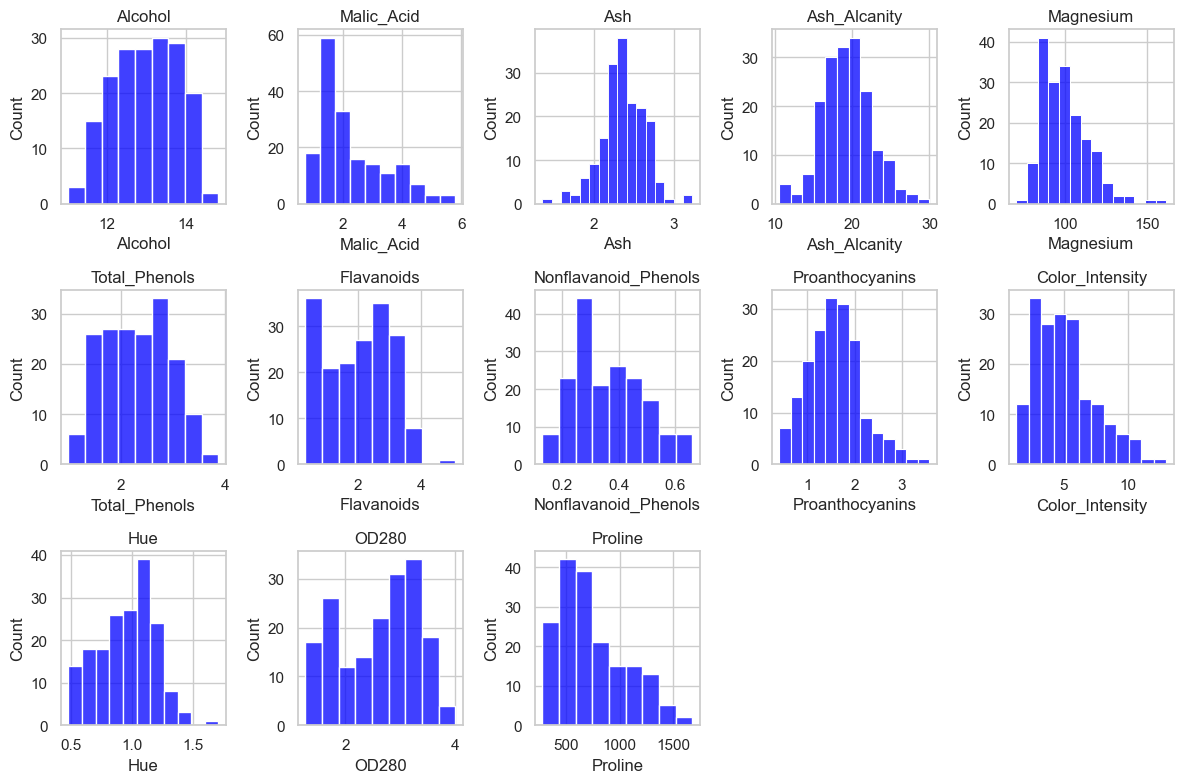

In [90]:
# First we have to explore and visualize the data.
# Histogram for each Attribute
plt.figure(figsize=(12, 8))
for i, col in enumerate(wines.columns):
    plt.subplot(3, 5, i+1)
    sns.histplot(wines[col], color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

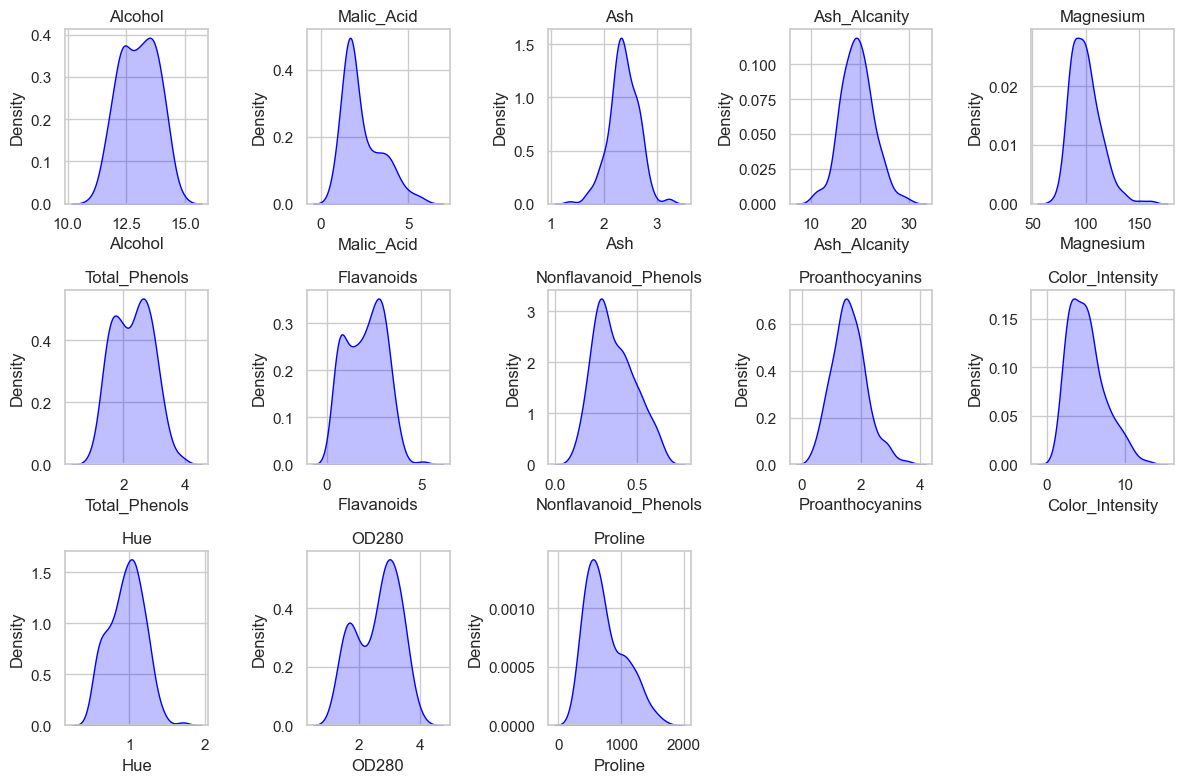

In [91]:
# Density plot for each Attribute
plt.figure(figsize=(12, 8))
for i, col in enumerate(wines.columns):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(wines[col], color='blue', fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

<Axes: >

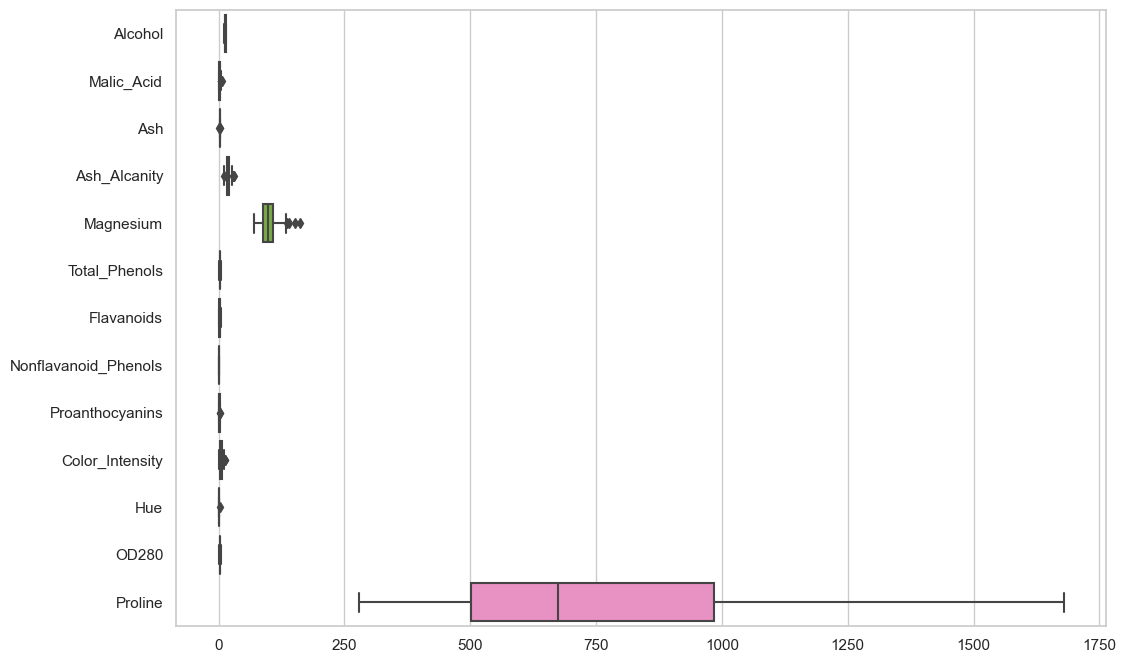

In [108]:
# Boxplot for each Attribute
plt.figure(figsize=(12, 8))
sns.boxplot(data=wines, orient="h")

/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

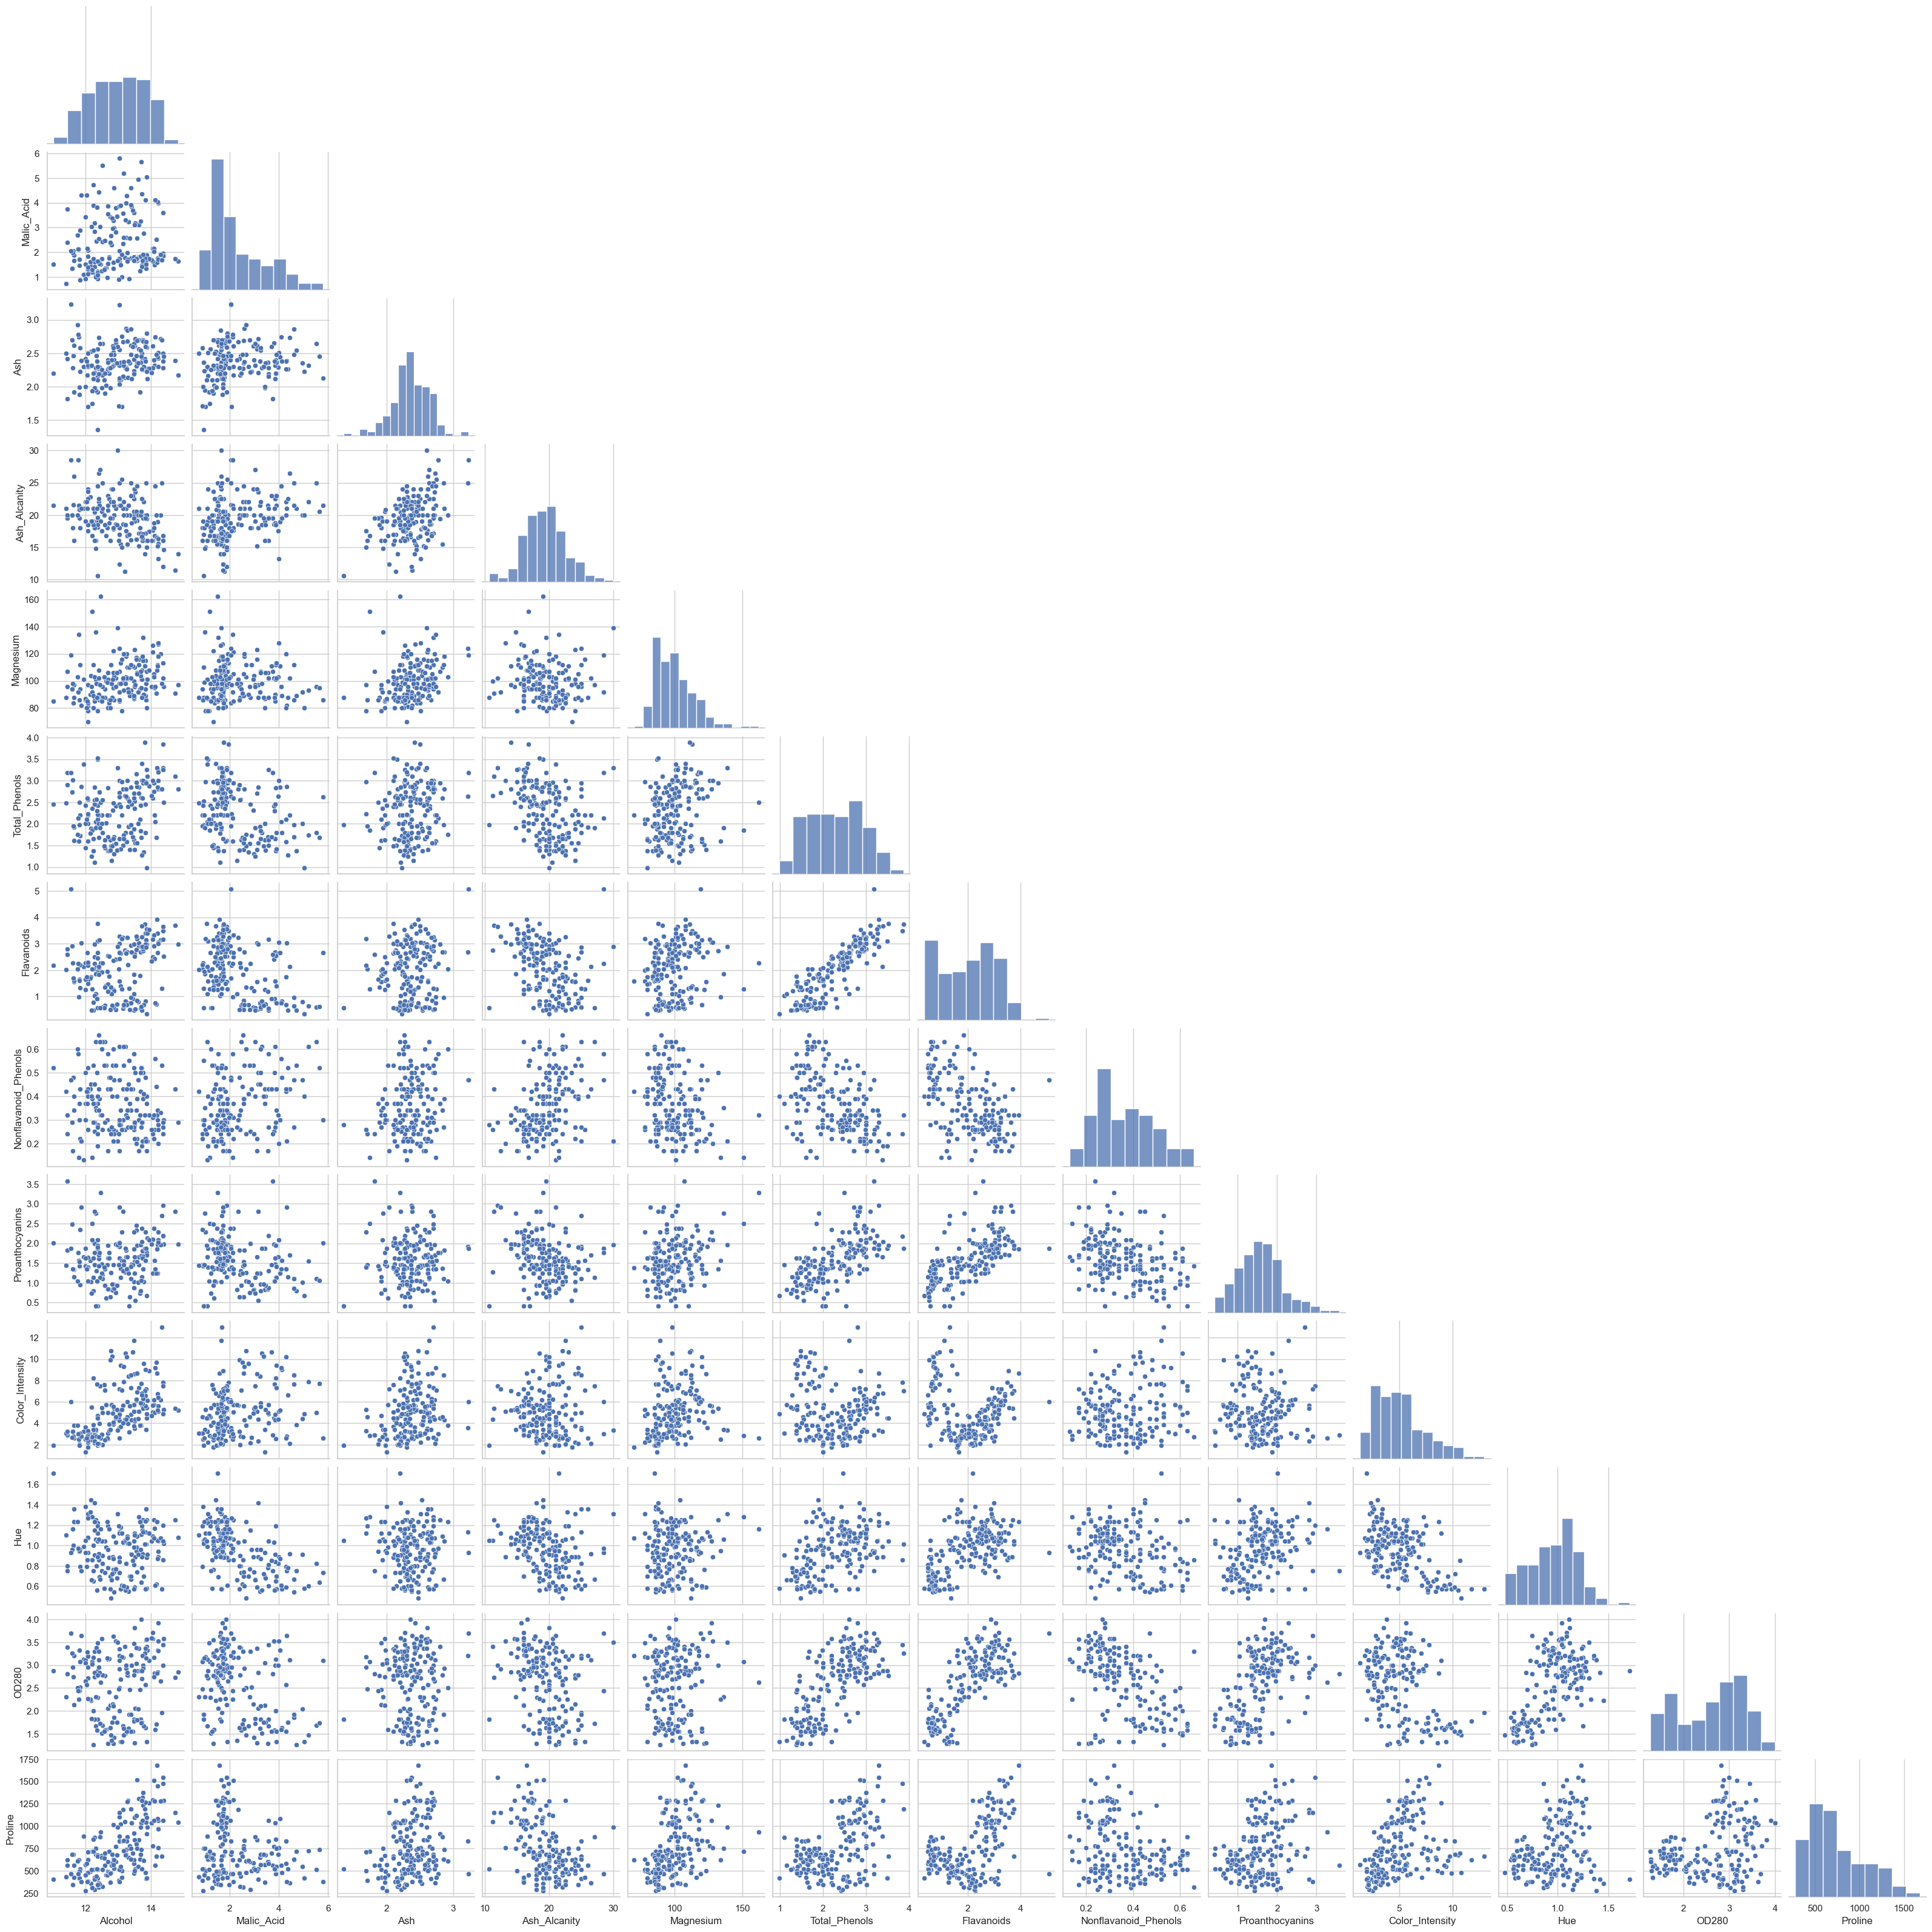

In [109]:
# What is the relationship between the different attributes? We can use the pairplot() function
# to create a graphical display of pairwise relationships.
sns.pairplot(wines, corner=True)
plt.show()

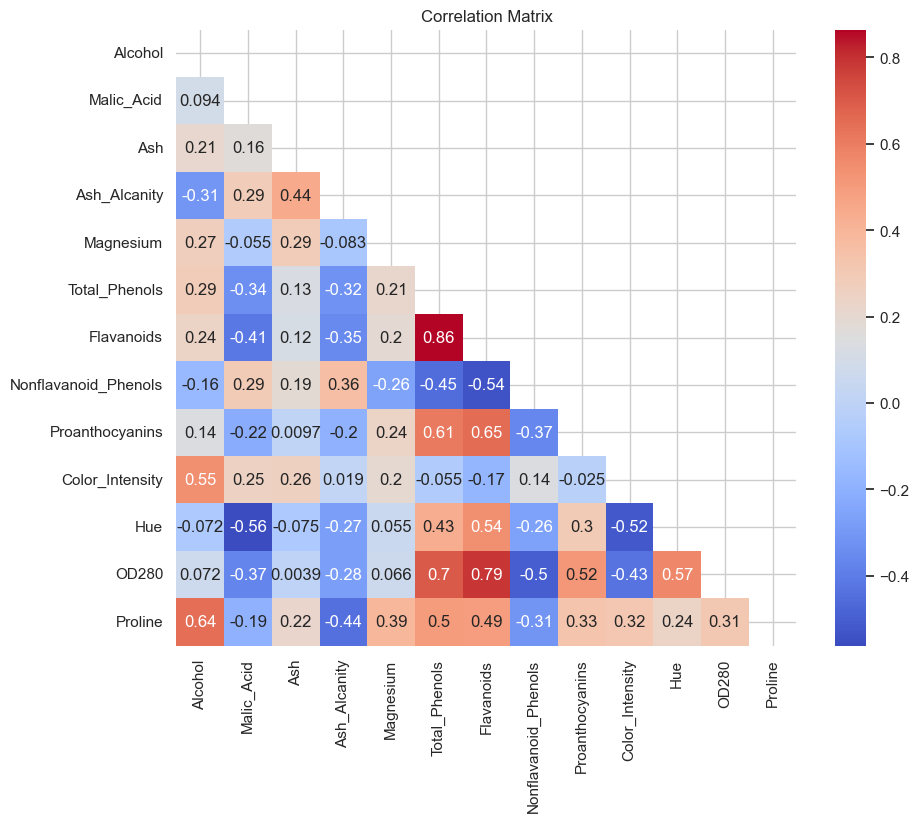

In [110]:
# Correlation matrix
ut = np.triu(wines.corr())
plt.figure(figsize=(10, 8))
sns.heatmap(wines.corr(), annot=True, cmap='coolwarm', mask = ut)
plt.title("Correlation Matrix")
plt.show()

There is a strong linear correlation between Total_Phenols and Flavanoids. We can model the relationship between these two variables by fitting a linear equation.

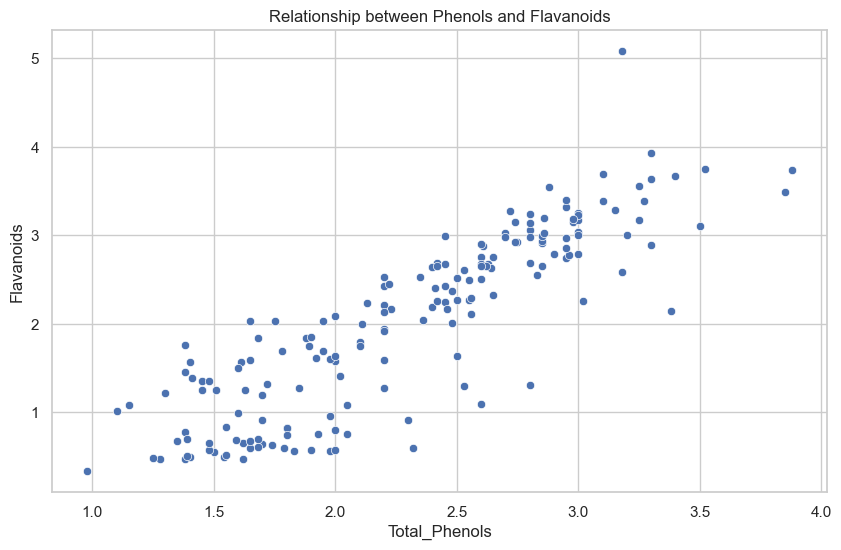

In [111]:
# Relationship between Phenols and Flavanoids
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Phenols', y='Flavanoids', data=wines)
plt.title("Relationship between Phenols and Flavanoids")
plt.show()

### Data preparation

Now that we have done a exploratory data analysis, we can prepare the data in order to execute the herarchical clustering algorithm.

In [112]:
# We have to normalize the variables to express them in the same range of values.
# In other words, normalization means adjusting values measured on different scales to a common scale.
# Normalization
scaler = StandardScaler()
wines_norm = pd.DataFrame(scaler.fit_transform(wines), columns=wines.columns)


Text(0.5, 1.0, 'Original data')

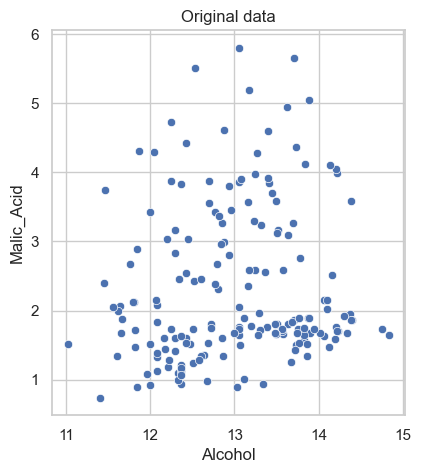

In [113]:
# Original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Alcohol', y='Malic_Acid', data=wines)
plt.title("Original data")

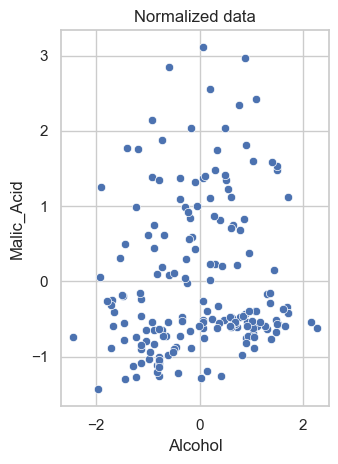

In [114]:
# Normalized data
plt.subplot(1, 2, 2)
sns.scatterplot(x='Alcohol', y='Malic_Acid', data=wines_norm)
plt.title("Normalized data")
plt.tight_layout()
plt.show()


The points in the normalized data are the same as the original one. The only thing that changes is the scale of the axis.

### Hierarchical clustering execution

El criterio de enlazamiento determina la distancia a utilizar entre los conjuntos de observación. El algoritmo fusionará los pares de conglomerados que minimicen este criterio.

- 'ward' minimiza la varianza de los conglomerados que se fusionan.
- 'average' utiliza la media de las distancias de cada observación de los dos conjuntos.
- El enlazamiento 'completo' o 'maximum' utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.
- 'simple' utiliza el mínimo de las distancias entre todas las observaciones de los dos conjuntos.

In [115]:
# Calculate the linkage matrix
Z = linkage(wines_norm, 'ward')

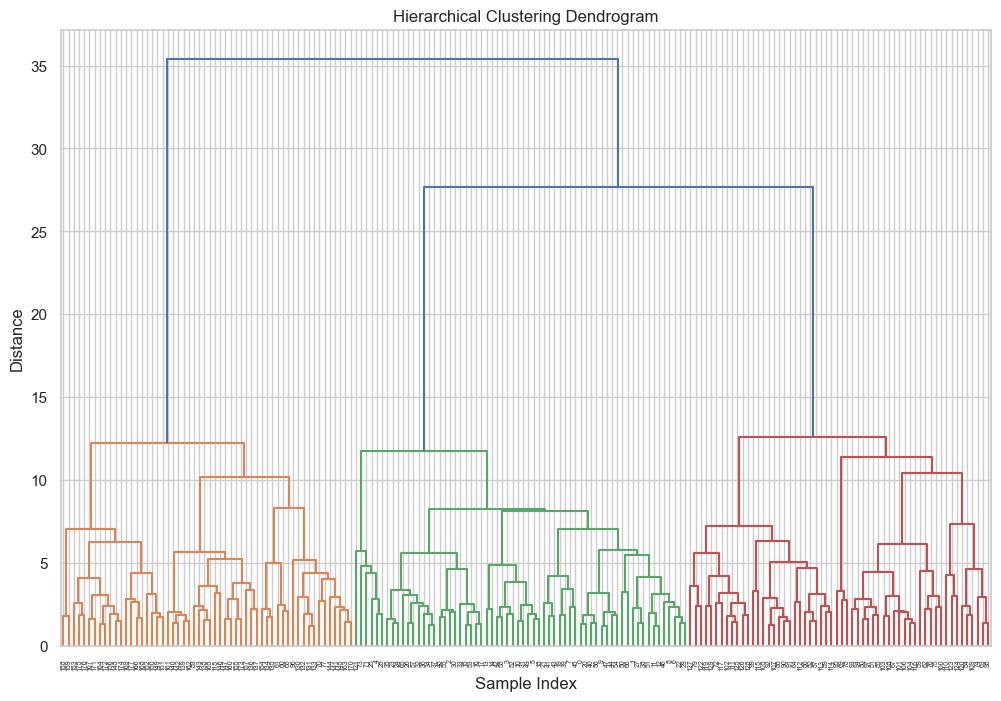

In [116]:
# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Agglomerative Clustering

Fusiona recursivamente el par de conglomerados que aumenta mínimamente una determinada distancia de enlazamiento (linkage distance).

affinitycadena de caracteres o invocable, default=”euclidean”
Métrica utilizada para calcular el enlazamiento. Puede ser «euclidean», «l1», «l2», «manhattan», «cosine», o «precomputed». Si linkage es «ward», sólo se acepta «euclidean». Si es «precomputed», se necesita una matriz de distancias (en lugar de una matriz de similitud) como entrada para el método fit.

In [117]:
# Hierarchical clustering with specified number of clusters
n_clusters = 3
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
wines['Cluster'] = hc.fit_predict(wines_norm)

/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/galanve/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

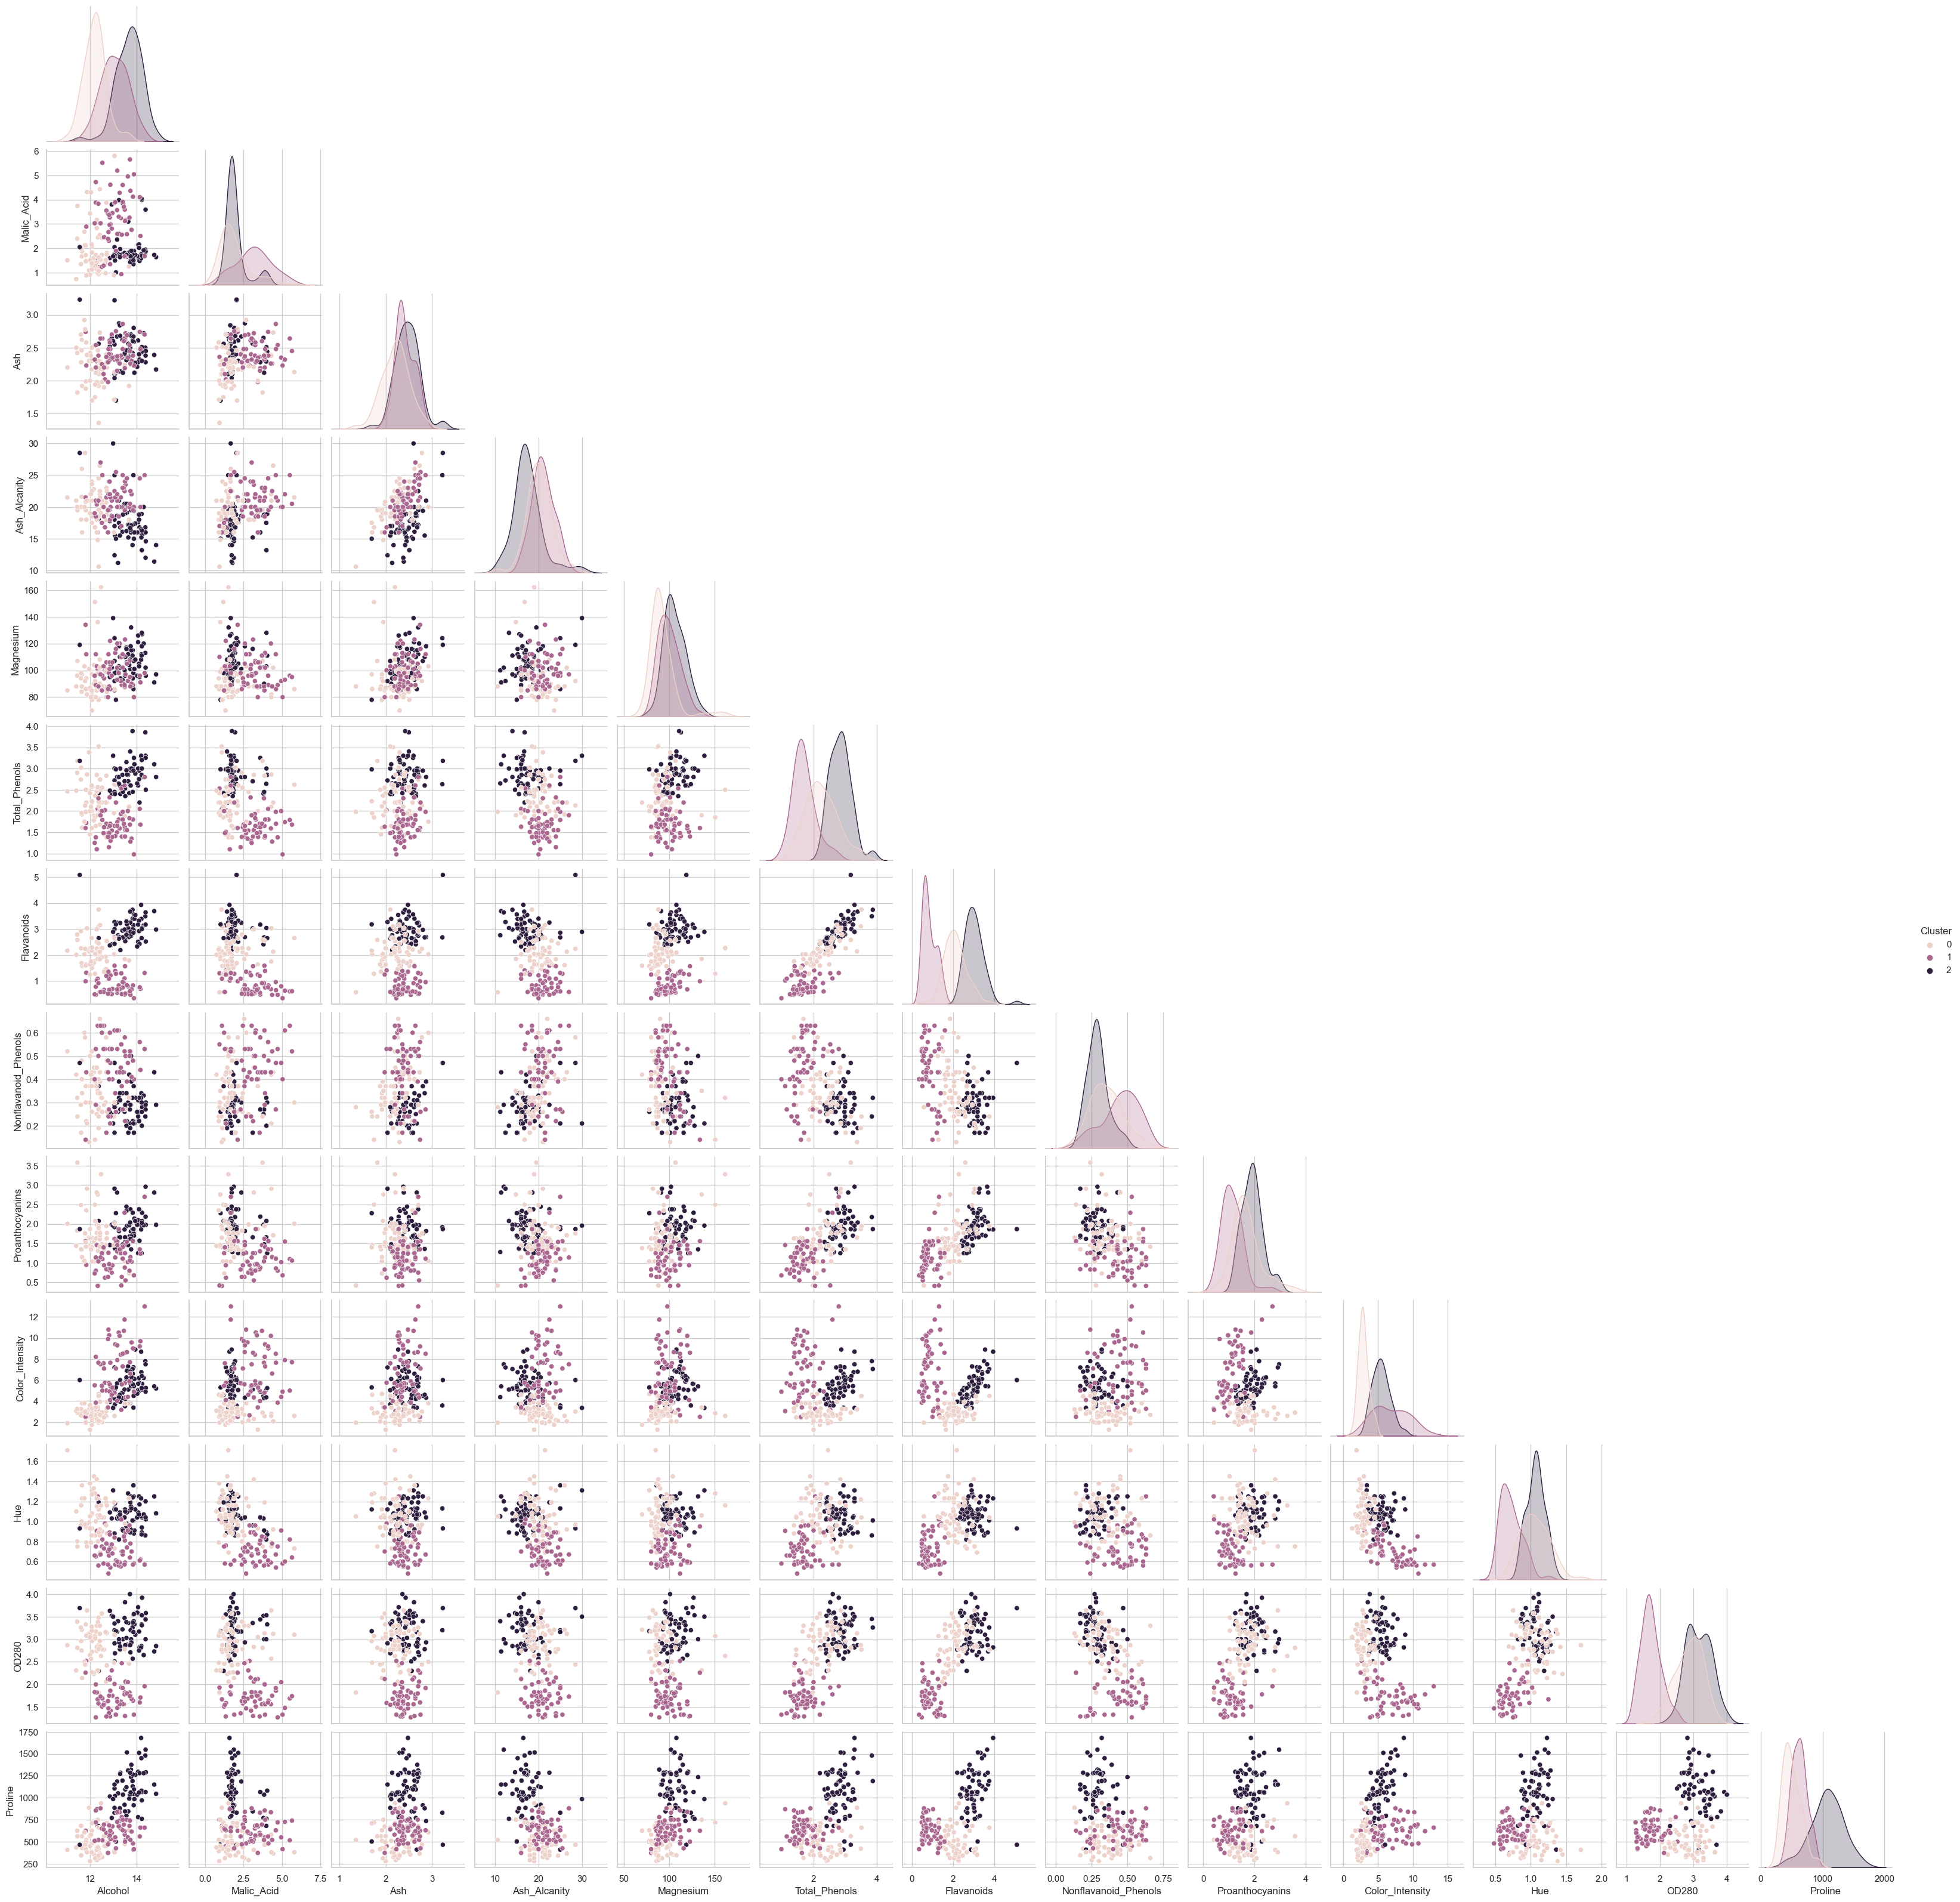

In [118]:
# Visualize clustering results
sns.pairplot(wines, hue='Cluster', corner=True)
plt.show()